In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the data
df = pd.read_csv("C:/Users/Meyke/Documents/Projecten/vaccines/vaccines_all_columns.csv", index_col='Unnamed: 0')

In [3]:
df.head()

,Imp_health_insurance,health_insurance_1,Imp_doctor_recc_h1n1,doctor_recc_h1n1_1,Imp_doctor_recc_seasonal,doctor_rec_seas_1,Imp_chronic_med_condition,chronic_med_condition_1,child_under_6M,Imp_health_worker,...,Imp_marital_status,Imp_edu,age,OHE__White,OHE__Other or Multiple,OHE__Hispanic,pos_regions,sex,h1n1_vaccine,seasonal_vaccine
0,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,1.0,60,1,0,0,1,1,0.0,0.0
1,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,2.0,40,1,0,0,1,0,0.0,1.0
2,1.0,0,0.0,0,0.0,0,1.0,1,0,0.0,...,0.0,4.0,26,1,0,0,1,0,0.0,0.0
3,1.0,0,0.0,0,1.0,1,1.0,1,0,0.0,...,0.0,2.0,70,1,0,0,0,1,0.0,1.0
4,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,1.0,3.0,50,1,0,0,1,1,0.0,0.0


In [4]:
all_col = df.columns.to_list()

In [5]:
best_options = ['h1n1_vaccine','seasonal_vaccine',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'Imp_doctor_recc_seasonal',
 'Imp_chronic_med_condition',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1_vacc_effective',
 'Imp_opinion_h1n1_risk',
 'Imp_opinion_h1n1_sick_from_vacc',
 'Imp_opinion_seas_vacc_effective',
 'Imp_household_adults',
 'Imp_household_children',
 'occ_pos_seas',
 'ind_pos_seas',
 'Imp_income_poverty',
 'Imp_rent_or_own',
 'OHE__Not in Labor Force',
 'OHE__Employed',
 'OHE__Unemployed',
 'Imp_marital_status',
 'Imp_edu',
 'age',
 'OHE__White',
 'OHE__Other or Multiple',
 'OHE__Hispanic',
 'pos_regions', 'sex']

In [6]:
best_options_h1n1 = ['h1n1_vaccine','seasonal_vaccine',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'Imp_doctor_recc_seasonal',
 'Imp_chronic_med_condition',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1_vacc_effective',
 'Imp_opinion_h1n1_risk',
 'Imp_opinion_h1n1_sick_from_vacc',
 'Imp_opinion_seas_vacc_effective',
 'Imp_household_adults',
 'Imp_household_children',
 'occ_pos_vacc',
 'ind_pos_vacc',
 'Imp_income_poverty',
 'Imp_rent_or_own',
 'OHE__Not in Labor Force',
 'OHE__Employed',
 'OHE__Unemployed',
 'Imp_marital_status',
 'Imp_edu',
 'age',
 'OHE__White',
 'OHE__Other or Multiple',
 'OHE__Hispanic',
 'pos_regions', 'sex']

In [7]:
best_options_seas = ['h1n1_vaccine','seasonal_vaccine',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'Imp_doctor_recc_seasonal',
 'Imp_chronic_med_condition',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1_vacc_effective',
 'Imp_opinion_h1n1_risk',
 'Imp_opinion_h1n1_sick_from_vacc',
 'Imp_opinion_seas_vacc_effective',
 'Imp_household_adults',
 'Imp_household_children',
 'occ_pos_seas',
 'ind_pos_seas',
 'Imp_income_poverty',
 'Imp_rent_or_own',
 'OHE__Not in Labor Force',
 'OHE__Employed',
 'OHE__Unemployed',
 'Imp_marital_status',
 'Imp_edu',
 'age',
 'OHE__White',
 'OHE__Other or Multiple',
 'OHE__Hispanic',
 'pos_regions', 'sex']

In [8]:
shortest = ['h1n1_vaccine','seasonal_vaccine',
 'Imp_doctor_recc_h1n1',
 'Imp_doctor_recc_seasonal',
 'Imp_chronic_med_condition',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1_vacc_effective',
 'Imp_opinion_h1n1_risk',
 'Imp_opinion_h1n1_sick_from_vacc',
 'Imp_opinion_seas_vacc_effective',
 'Imp_household_adults',
 'Imp_household_children',
 'Imp_income_poverty',
 'Imp_rent_or_own',
 'Imp_edu',
 'age',
 'OHE__White',
 'OHE__Other or Multiple',
 'OHE__Hispanic',
 'pos_regions',
 'sex']

In [9]:
listOfDfsToTest_seas = [all_col,best_options_seas,shortest]
listOfDfsToTest_h1n1 = [all_col,best_options_h1n1,shortest]

## Test first models for Seasonal

In [83]:
def prepDataForModelling(df, listOfDfsToTest_seas):
    for listofDf in listOfDfsToTest_seas:
        df =df[listofDf]
        
        correlation = df.corr(method="spearman")
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        fig = plt.figure(figsize=(20,15), dpi=100, facecolor = 'w', edgecolor="k")
        figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")
        plt.title("", fontsize = 20) 
        plt.show()
        
        # split df to only get the train data
        df_to_submit = df[df['seasonal_vaccine'].isna()]
        df = df[df['seasonal_vaccine'].notna()]
        
        # split into x and y
        x = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"]).values
        y = df[["seasonal_vaccine"]].values
        
        # Scale the x data
        scaler = StandardScaler()
        scaler.fit(x)
        x_scaled = scaler.transform(x)

        # Create training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)
        
        # Try bunch of models for first impression
        # with non-scaled or regualrized data
        models=[LogisticRegression(max_iter = 100000,  random_state=42),
                KNeighborsClassifier(n_neighbors = 4),
                DecisionTreeClassifier( random_state=42),
                RandomForestClassifier( random_state=42),
                XGBClassifier( random_state=42),
                BaggingClassifier( random_state=42), 
                AdaBoostClassifier( random_state=42),
                GradientBoostingClassifier( random_state=42)]

        names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier']

        train_accuracy=[]
        test_accuracy=[]
        train_f1=[]
        test_f1=[]
        train_seas_auc=[]
        test_seas_auc=[]


        d={}
        for model in range (len(models)):
            clf=models[model]
            clf.fit(x_train,y_train)

            # y_pred
            test_pred=clf.predict(x_test)
            train_pred=clf.predict(x_train) 

            # y_proba
            y_pred_proba_train = clf.predict_proba(x_train)
            y_pred_proba_test = clf.predict_proba(x_test)

            # accuracy
            train_accuracy.append(accuracy_score(y_train, train_pred))
            test_accuracy.append(accuracy_score(y_test, test_pred))

            # f1
            train_f1.append(f1_score(y_train, train_pred, average='weighted'))
            test_f1.append(f1_score(y_test, test_pred, average='weighted'))

            # auc_seasonal
            train_seas_auc.append(roc_auc_score(y_train, y_pred_proba_train[:, 1], average=None))
            test_seas_auc.append(roc_auc_score(y_test, y_pred_proba_test[:, 1], average=None))
            #print(y_pred_proba_train)

        d= {'Model':names,'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Train f1':train_f1, 'Test f1': test_f1, 'Train AUC Seas': train_seas_auc, 'Test AUC Seas': test_seas_auc}   
        score_df = pd.DataFrame(d)
        print(score_df)

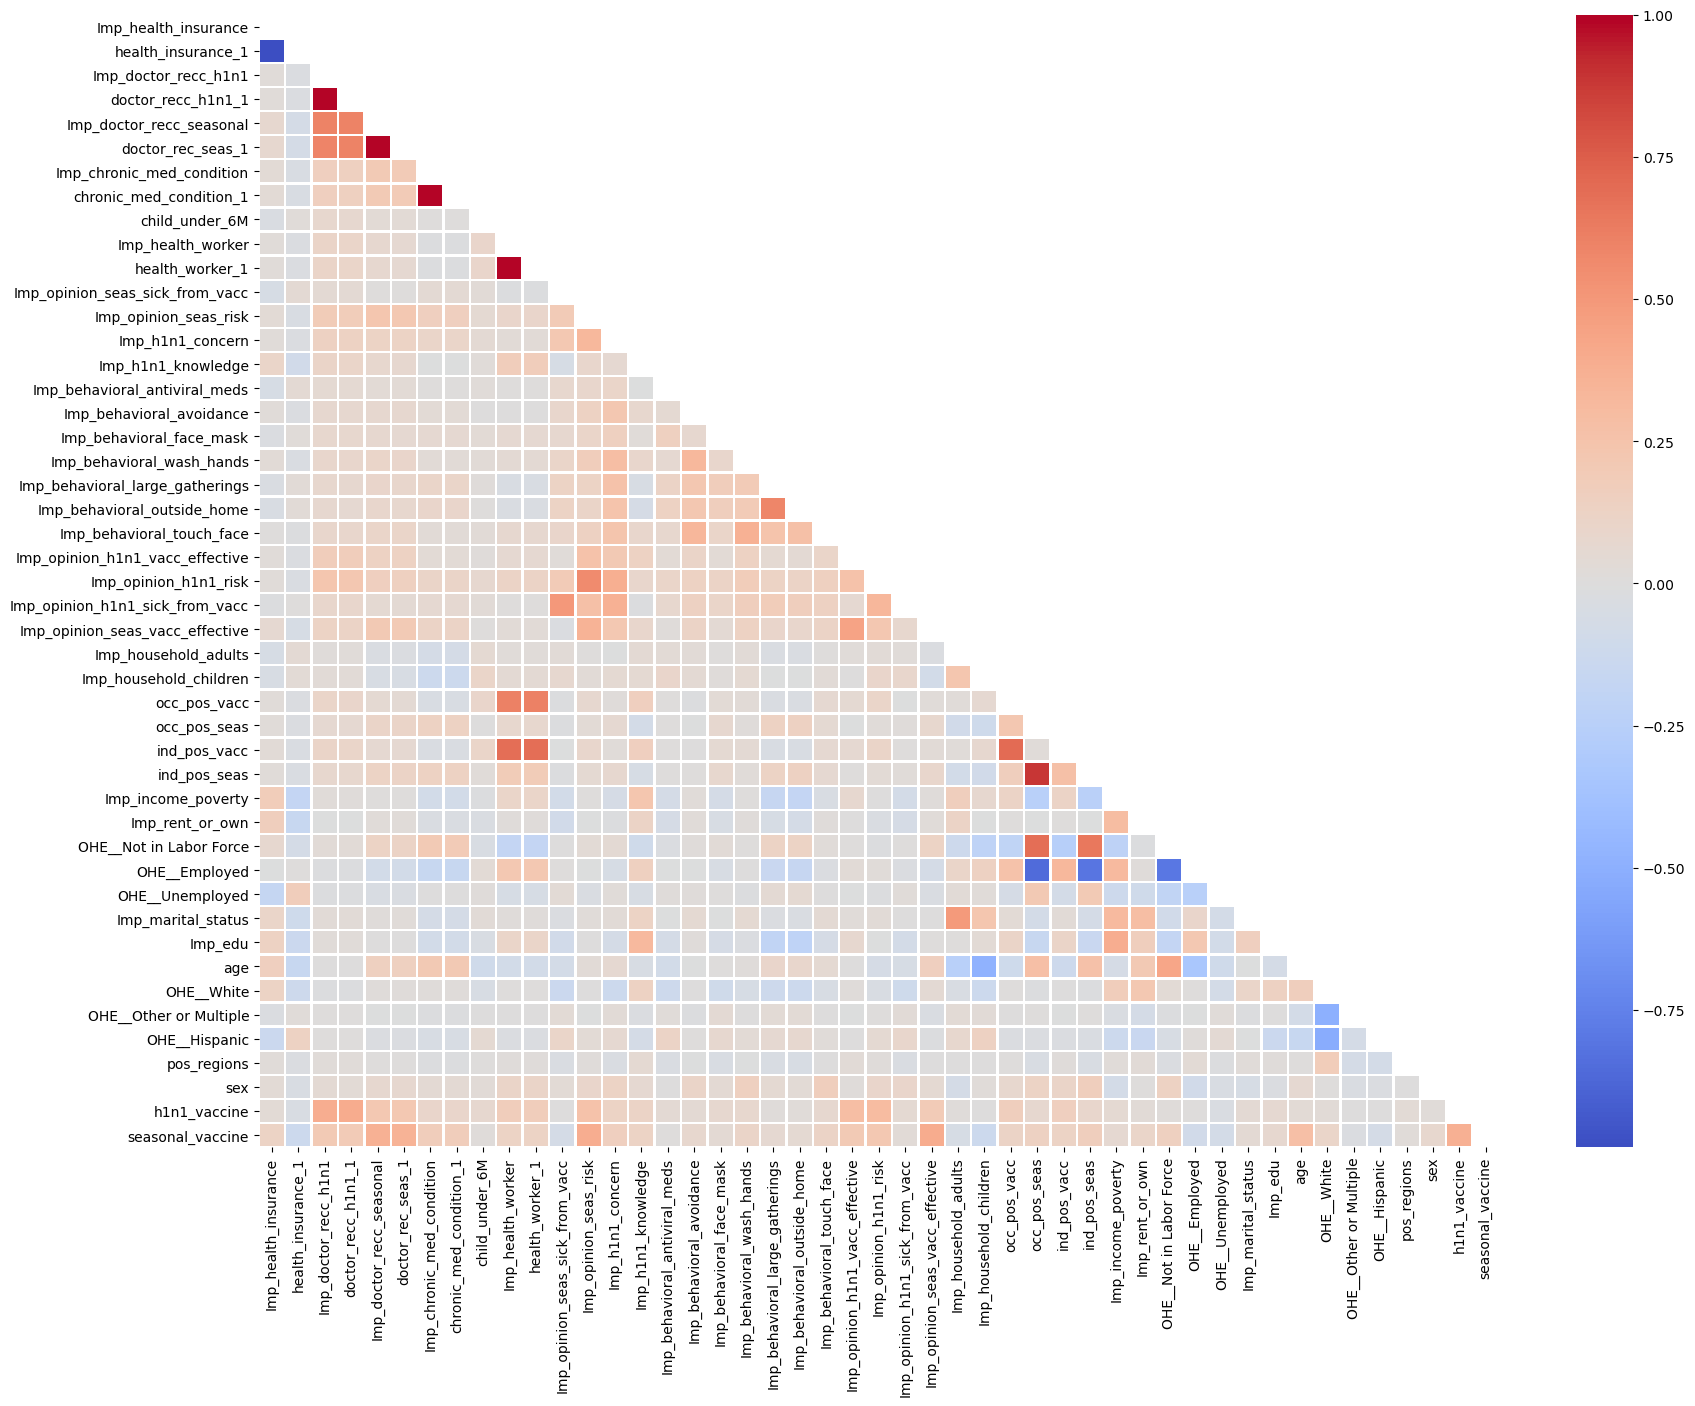

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-83-db7c9e9e9971>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.777201       0.774242  0.776725   
1                KNN Classifier        0.806248       0.703856  0.802821   
2      Decision Tree Classifier        0.999840       0.672907  0.999840   
3      Random Forest Classifier        0.999840       0.773992  0.999840   
4                XGB Classifier        0.881566       0.775739  0.881540   
5            Bagging Classifier        0.984059       0.742044  0.984048   
6           AdaBoost Classifier        0.779876       0.771372  0.779304   
7  Gradient Boosting Classifier        0.792393       0.778610  0.792096   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.773622        0.851830       0.845895  
1  0.697502        0.900977       0.762632  
2  0.672869        1.000000       0.671158  
3  0.773567        1.000000       0.846883  
4  0.775503        0.950924       0.845032  
5  0.740662        0.998916       0.809432  


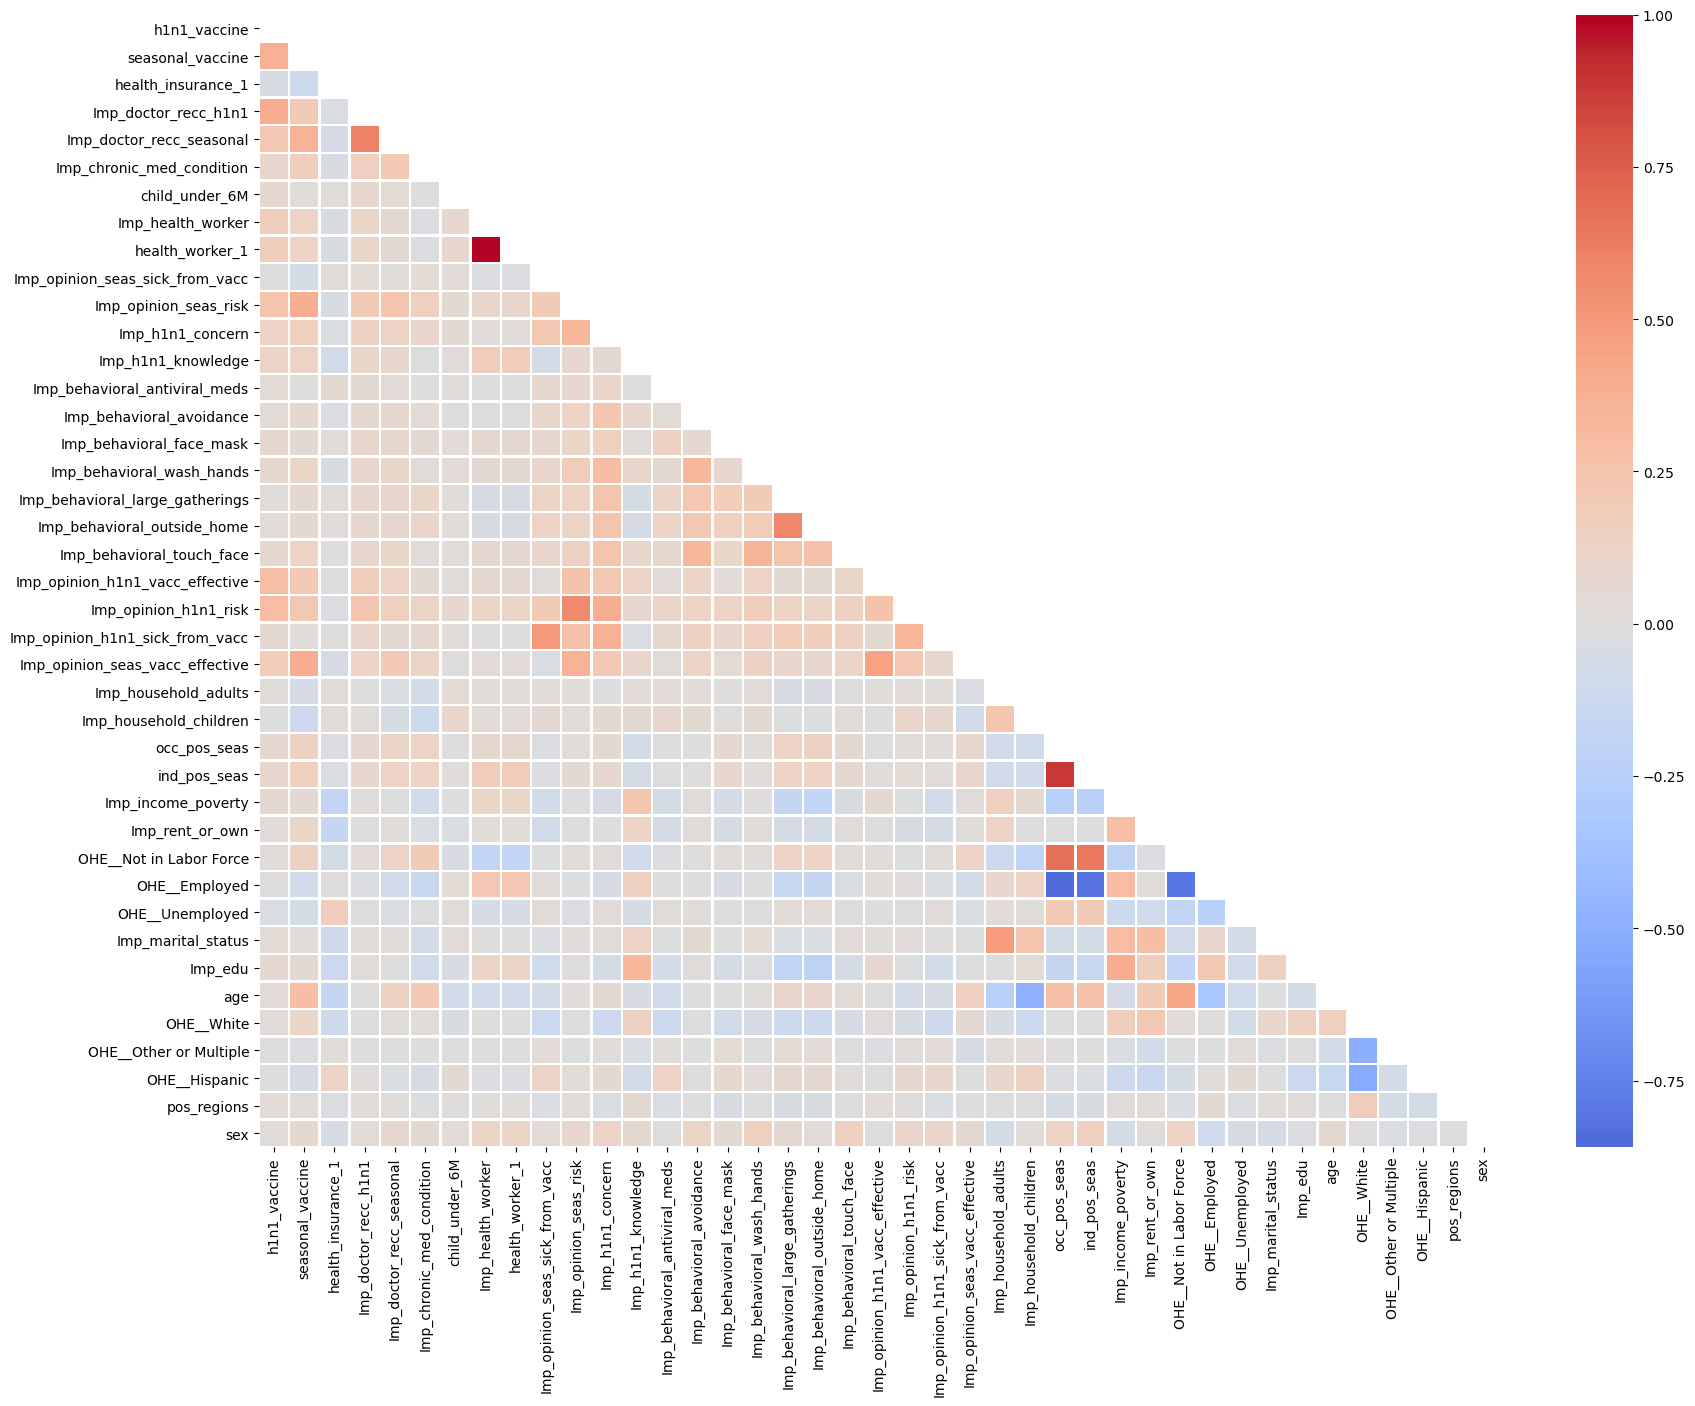

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-83-db7c9e9e9971>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.777950       0.772869  0.777459   
1                KNN Classifier        0.801220       0.700362  0.797117   
2      Decision Tree Classifier        0.999840       0.674154  0.999840   
3      Random Forest Classifier        0.999840       0.772120  0.999840   
4                XGB Classifier        0.882797       0.770248  0.882768   
5            Bagging Classifier        0.983738       0.742918  0.983726   
6           AdaBoost Classifier        0.779127       0.770373  0.778602   
7  Gradient Boosting Classifier        0.792661       0.774242  0.792321   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.772263        0.851113       0.845555  
1  0.692415        0.899136       0.760851  
2  0.674062        1.000000       0.672485  
3  0.771555        1.000000       0.844575  
4  0.769978        0.953154       0.842592  
5  0.741295        0.998968       0.807538  


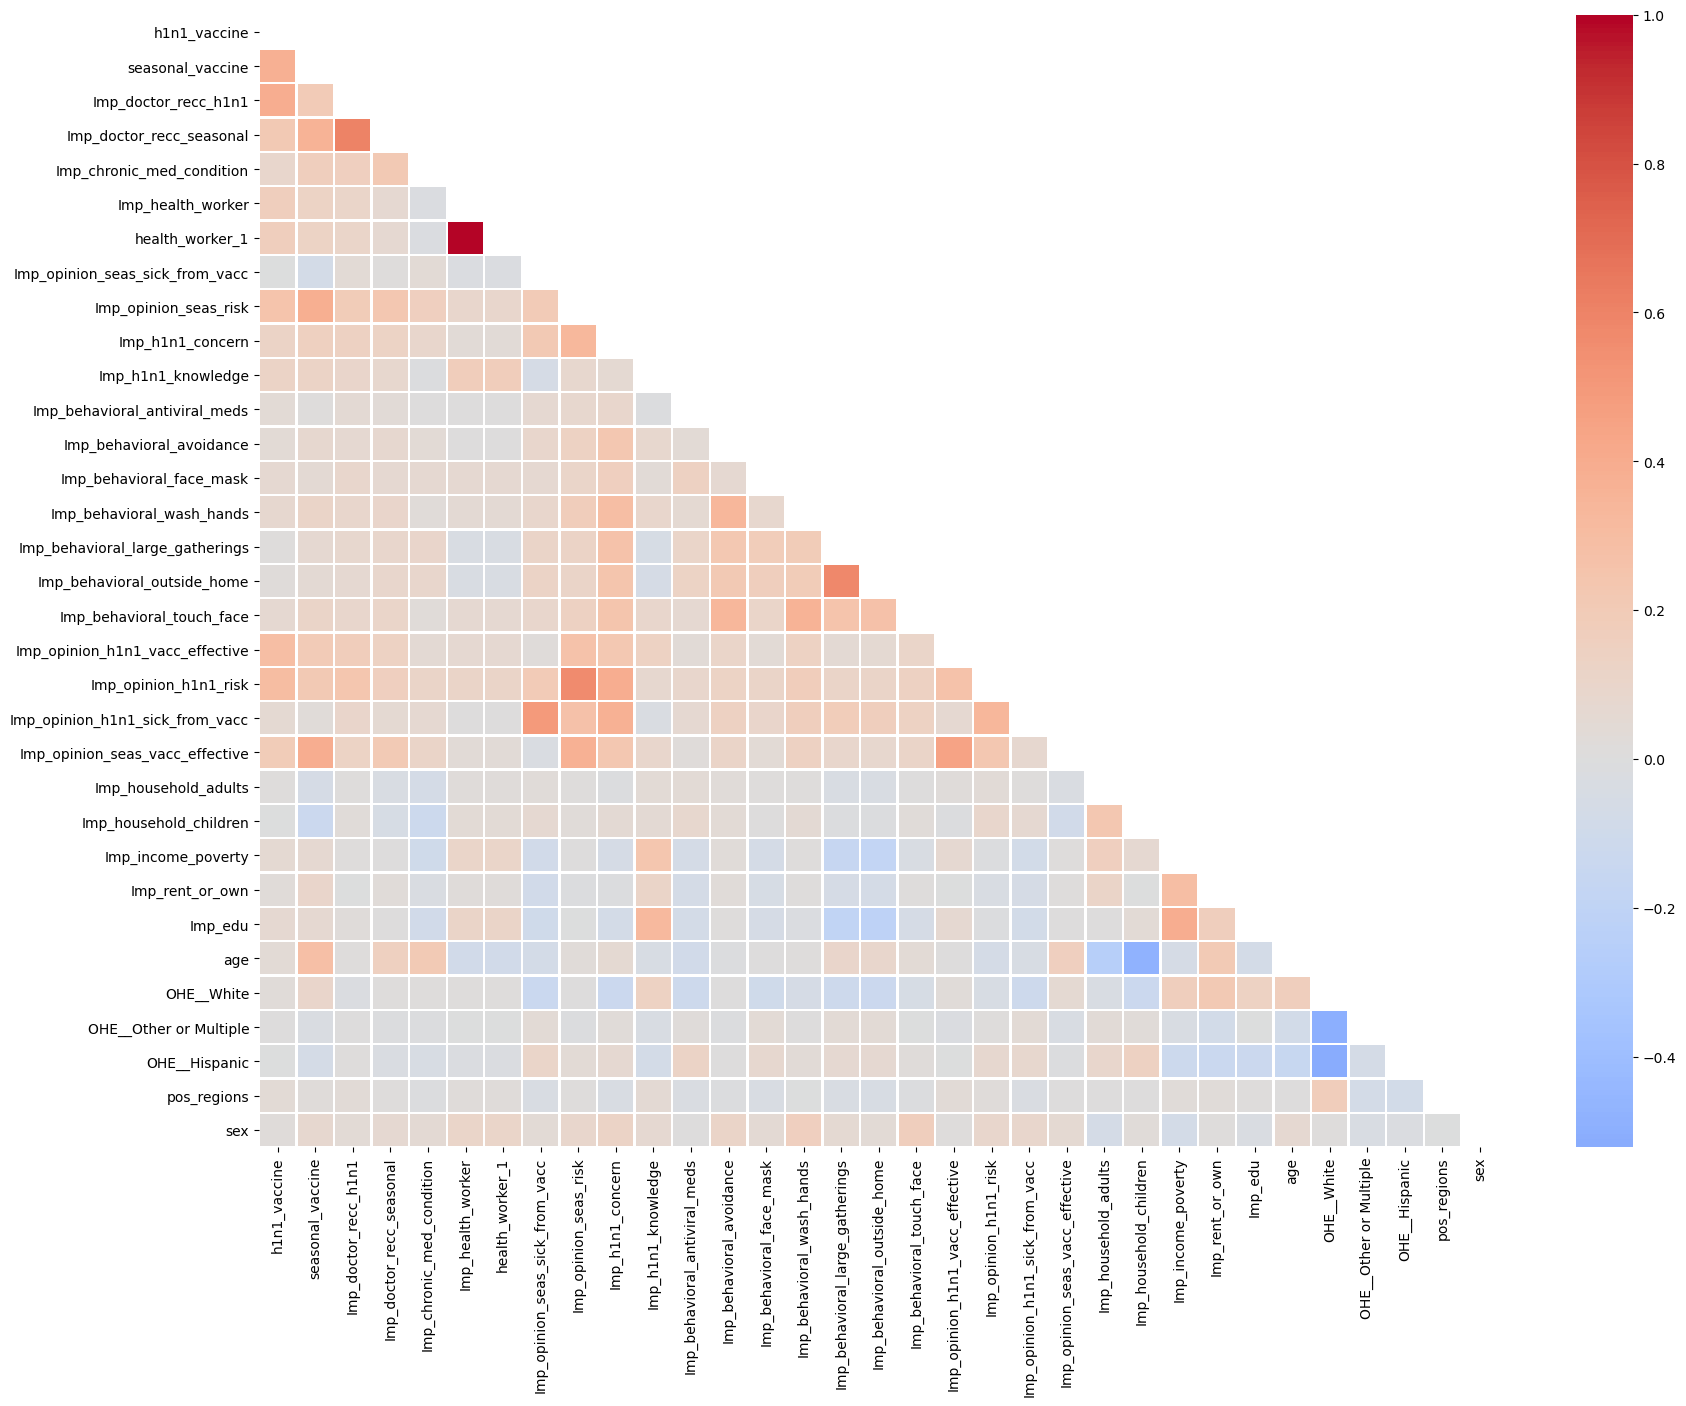

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-83-db7c9e9e9971>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.776131       0.769500  0.775650   
1                KNN Classifier        0.799829       0.704355  0.795724   
2      Decision Tree Classifier        0.999626       0.677898  0.999626   
3      Random Forest Classifier        0.999626       0.770248  0.999626   
4                XGB Classifier        0.873703       0.770248  0.873654   
5            Bagging Classifier        0.983257       0.739423  0.983244   
6           AdaBoost Classifier        0.779983       0.770124  0.779376   
7  Gradient Boosting Classifier        0.792286       0.776613  0.791968   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.768770        0.847591       0.842404  
1  0.697222        0.898133       0.757280  
2  0.677696        1.000000       0.675778  
3  0.769764        0.999999       0.841631  
4  0.770000        0.945998       0.839780  
5  0.738033        0.998982       0.805195  


In [84]:
prepDataForModelling(df, listOfDfsToTest)

## Test first models for h1n1

In [85]:
def prepDataForModelling(df, listOfDfsToTest_h1n1):
    for listofDf in listOfDfsToTest_seas:
        df =df[listofDf]
        
        correlation = df.corr(method="spearman")
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        fig = plt.figure(figsize=(20,15), dpi=100, facecolor = 'w', edgecolor="k")
        figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")
        plt.title("", fontsize = 20) 
        plt.show()
        
        # split df to only get the train data
        df_to_submit = df[df['h1n1_vaccine'].isna()]
        df = df[df['h1n1_vaccine'].notna()]
        
        # split into x and y
        x = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"]).values
        y = df[["h1n1_vaccine"]].values
        
        # Scale the x data
        scaler = StandardScaler()
        scaler.fit(x)
        x_scaled = scaler.transform(x)

        # Create training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)
        
        # Try bunch of models for first impression
        # with non-scaled or regualrized data
        models=[LogisticRegression(max_iter = 100000,  random_state=42),
                KNeighborsClassifier(n_neighbors = 4),
                DecisionTreeClassifier( random_state=42),
                RandomForestClassifier( random_state=42),
                XGBClassifier( random_state=42),
                BaggingClassifier( random_state=42), 
                AdaBoostClassifier( random_state=42),
                GradientBoostingClassifier( random_state=42)]

        names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier']

        train_accuracy=[]
        test_accuracy=[]
        train_f1=[]
        test_f1=[]
        train_seas_auc=[]
        test_seas_auc=[]


        d={}
        for model in range (len(models)):
            clf=models[model]
            clf.fit(x_train,y_train)

            # y_pred
            test_pred=clf.predict(x_test)
            train_pred=clf.predict(x_train) 

            # y_proba
            y_pred_proba_train = clf.predict_proba(x_train)
            y_pred_proba_test = clf.predict_proba(x_test)

            # accuracy
            train_accuracy.append(accuracy_score(y_train, train_pred))
            test_accuracy.append(accuracy_score(y_test, test_pred))

            # f1
            train_f1.append(f1_score(y_train, train_pred, average='weighted'))
            test_f1.append(f1_score(y_test, test_pred, average='weighted'))

            # auc_seasonal
            train_seas_auc.append(roc_auc_score(y_train, y_pred_proba_train[:, 1], average=None))
            test_seas_auc.append(roc_auc_score(y_test, y_pred_proba_test[:, 1], average=None))
            #print(y_pred_proba_train)

        d= {'Model':names,'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Train f1':train_f1, 'Test f1': test_f1, 'Train AUC Seas': train_seas_auc, 'Test AUC Seas': test_seas_auc}   
        score_df = pd.DataFrame(d)
        print(score_df)

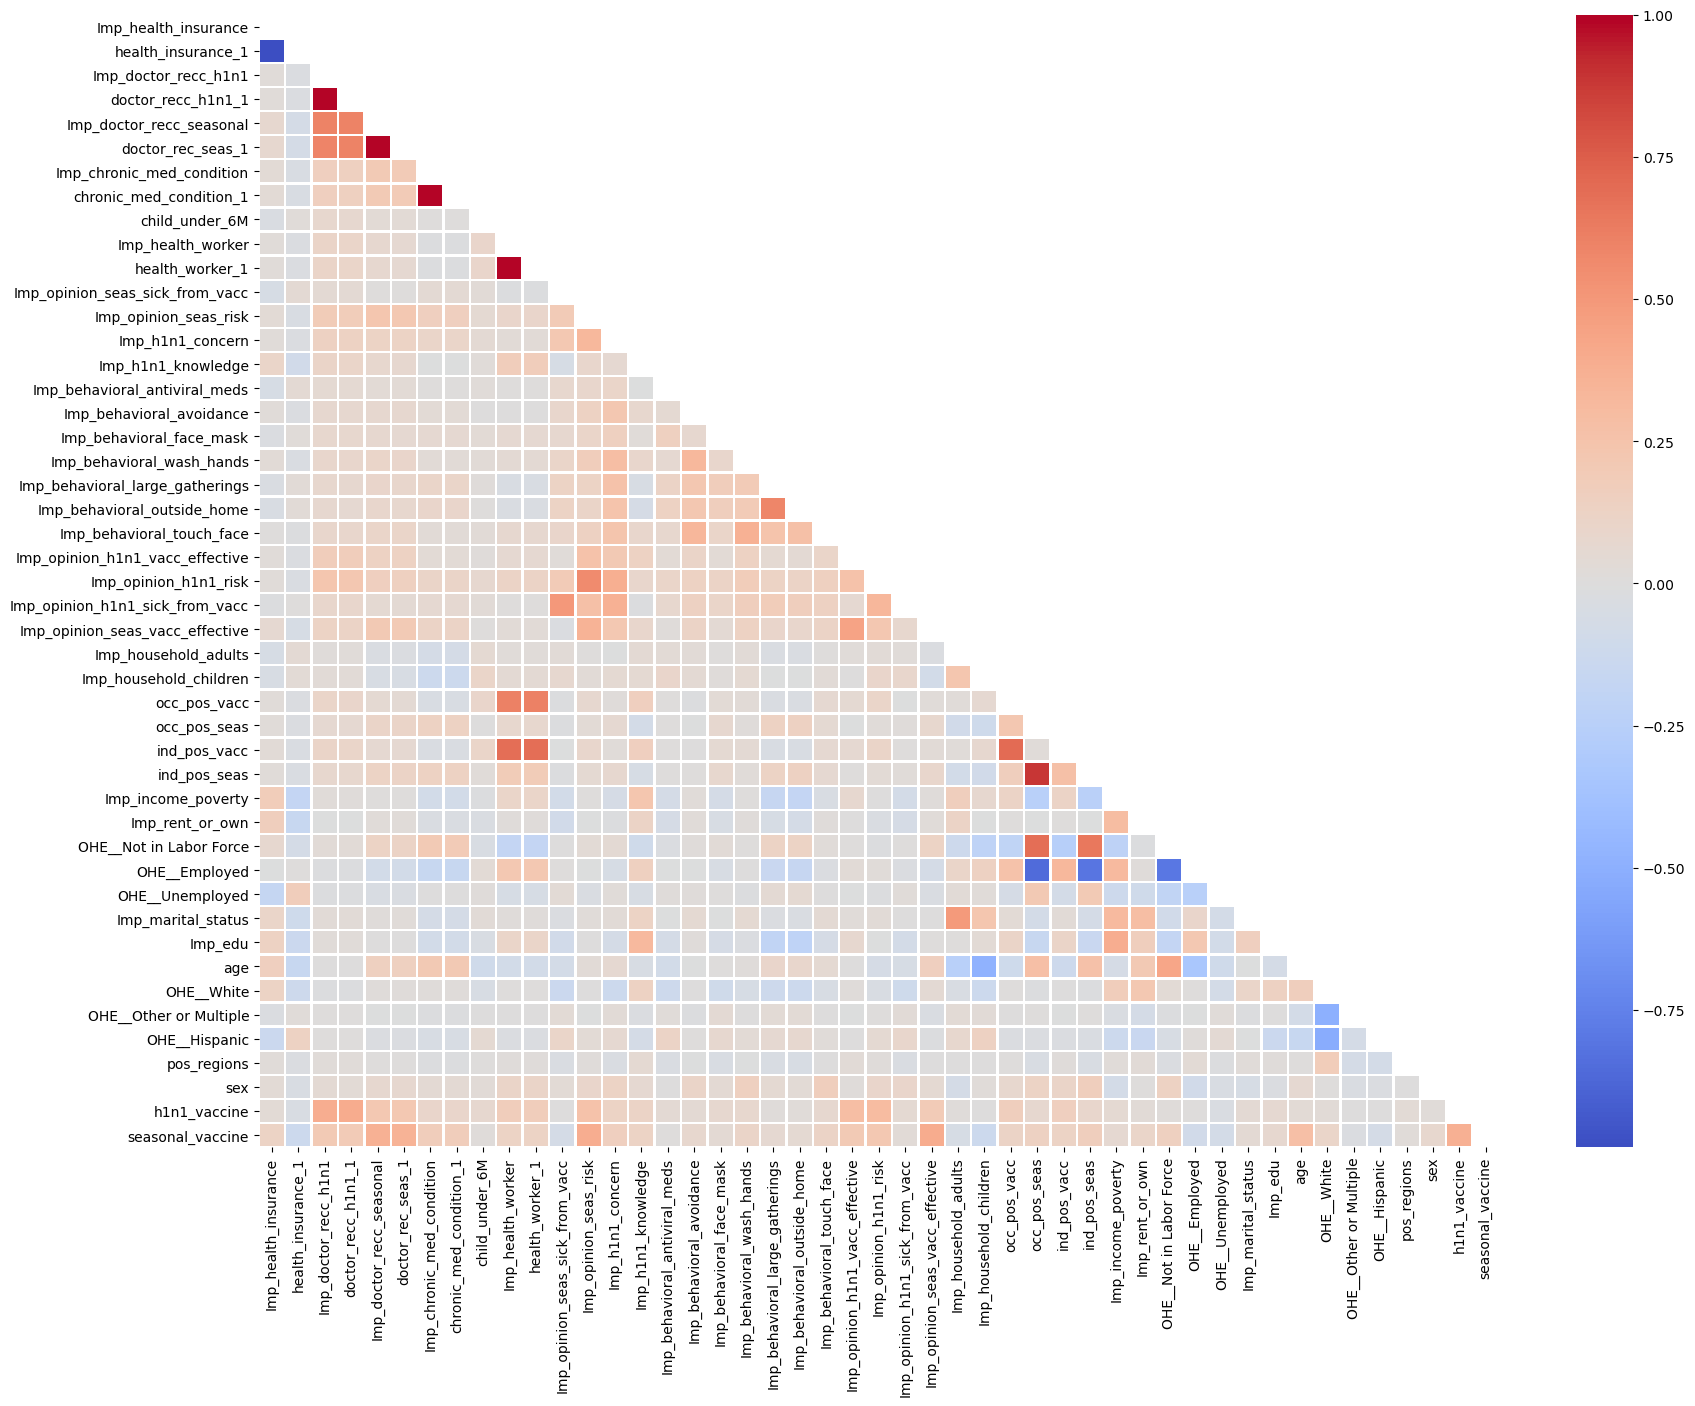

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-85-8065d4f9223d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.837007       0.837264  0.821684   
1                KNN Classifier        0.856318       0.811182  0.835691   
2      Decision Tree Classifier        0.999947       0.749657  0.999947   
3      Random Forest Classifier        0.999893       0.835642  0.999893   
4                XGB Classifier        0.919867       0.835018  0.916321   
5            Bagging Classifier        0.983417       0.817671  0.983209   
6           AdaBoost Classifier        0.837488       0.833645  0.822408   
7  Gradient Boosting Classifier        0.845512       0.837514  0.832229   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.823428        0.835853       0.826646  
1  0.783308        0.912561       0.735258  
2  0.754723        1.000000       0.647980  
3  0.822052        1.000000       0.822713  
4  0.824445        0.960142       0.821900  
5  0.802268        0.999187       0.782744  


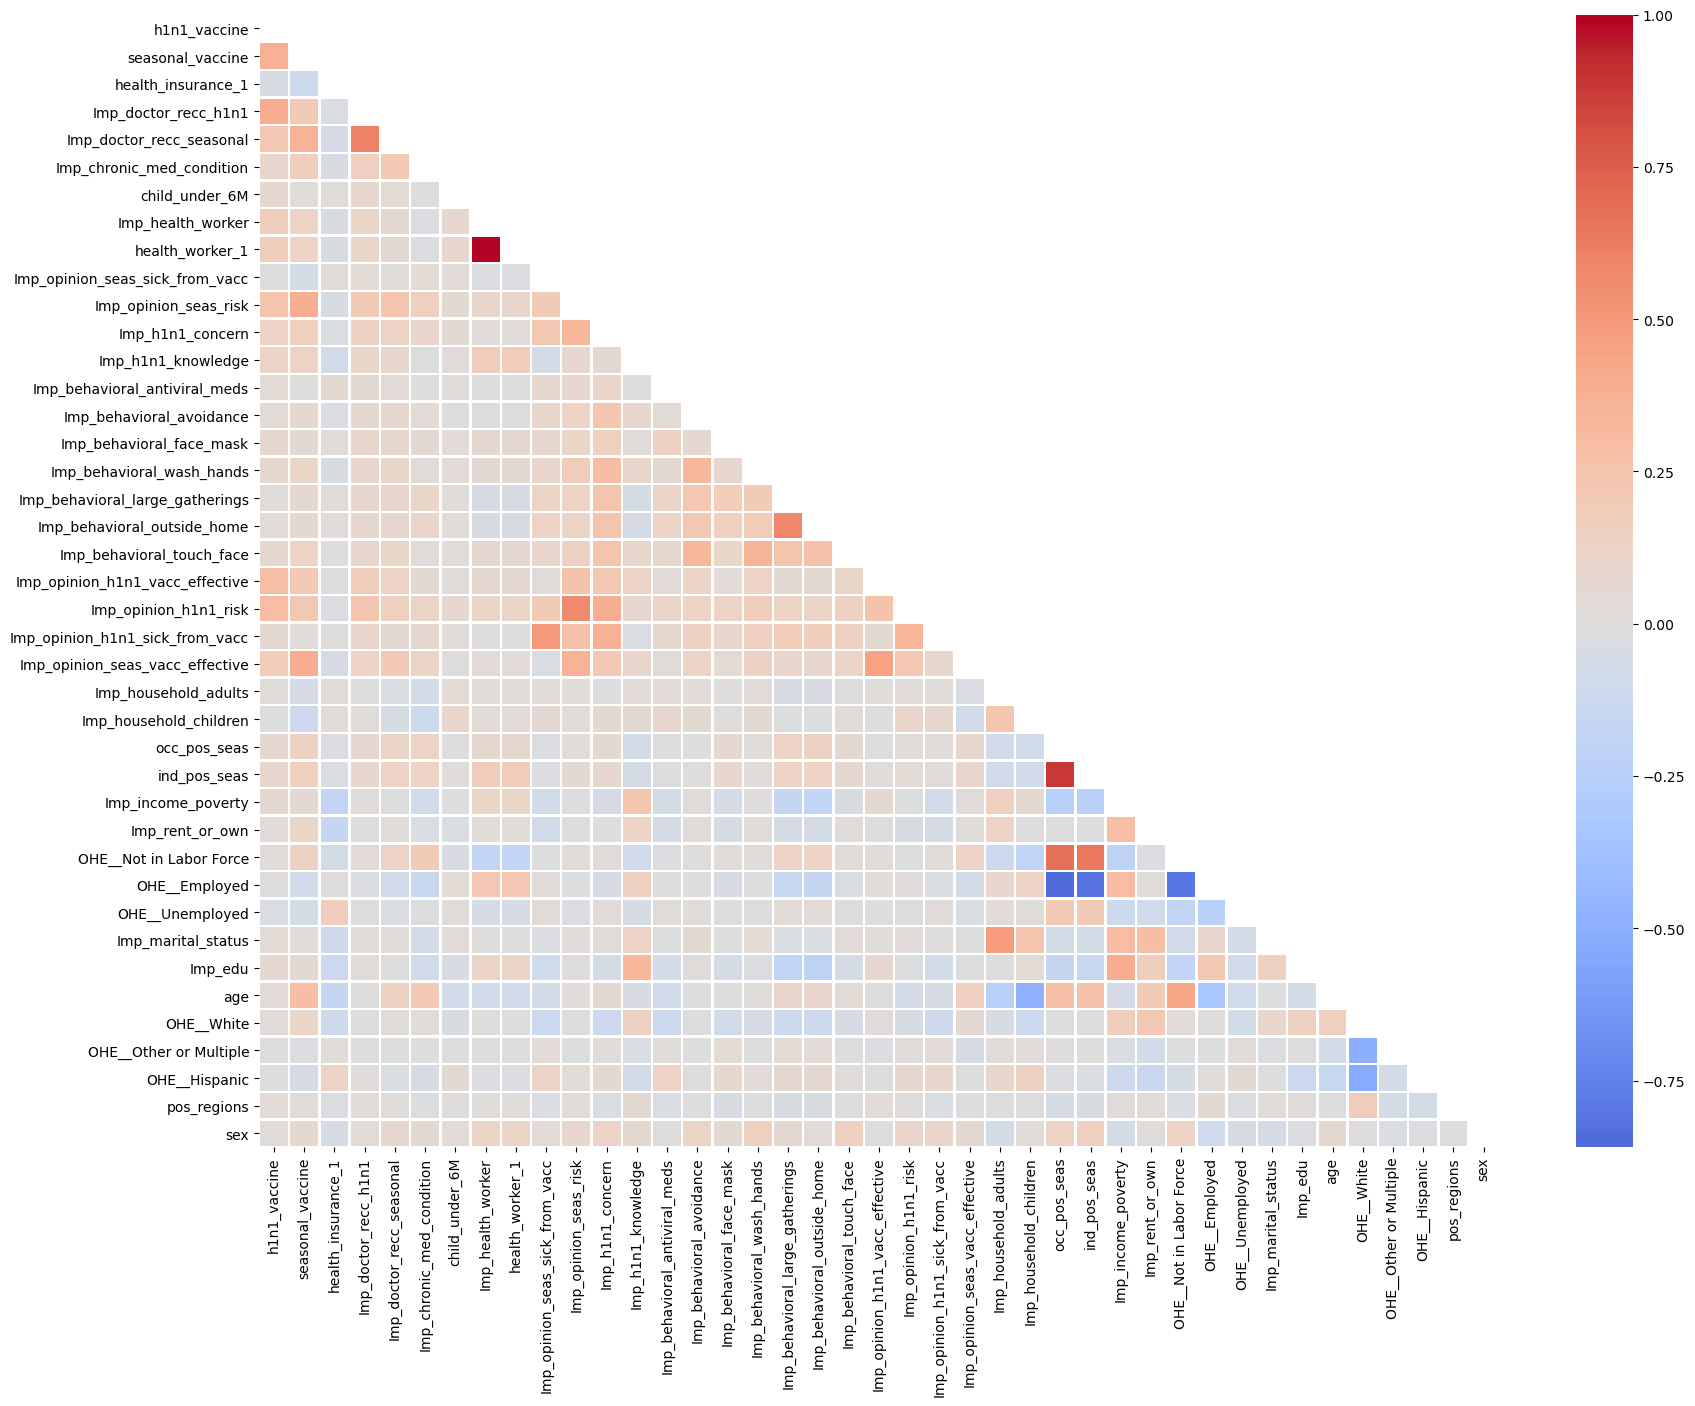

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-85-8065d4f9223d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.834439       0.834769  0.818795   
1                KNN Classifier        0.851182       0.807563  0.827509   
2      Decision Tree Classifier        0.999947       0.752652  0.999947   
3      Random Forest Classifier        0.999893       0.833770  0.999893   
4                XGB Classifier        0.921312       0.833895  0.917990   
5            Bagging Classifier        0.983845       0.813927  0.983642   
6           AdaBoost Classifier        0.835188       0.832023  0.819695   
7  Gradient Boosting Classifier        0.842944       0.836141  0.829926   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.820359        0.834013       0.824714  
1  0.774902        0.913922       0.727545  
2  0.756892        1.000000       0.648767  
3  0.817972        1.000000       0.819971  
4  0.823545        0.962918       0.819969  
5  0.798675        0.999206       0.778532  


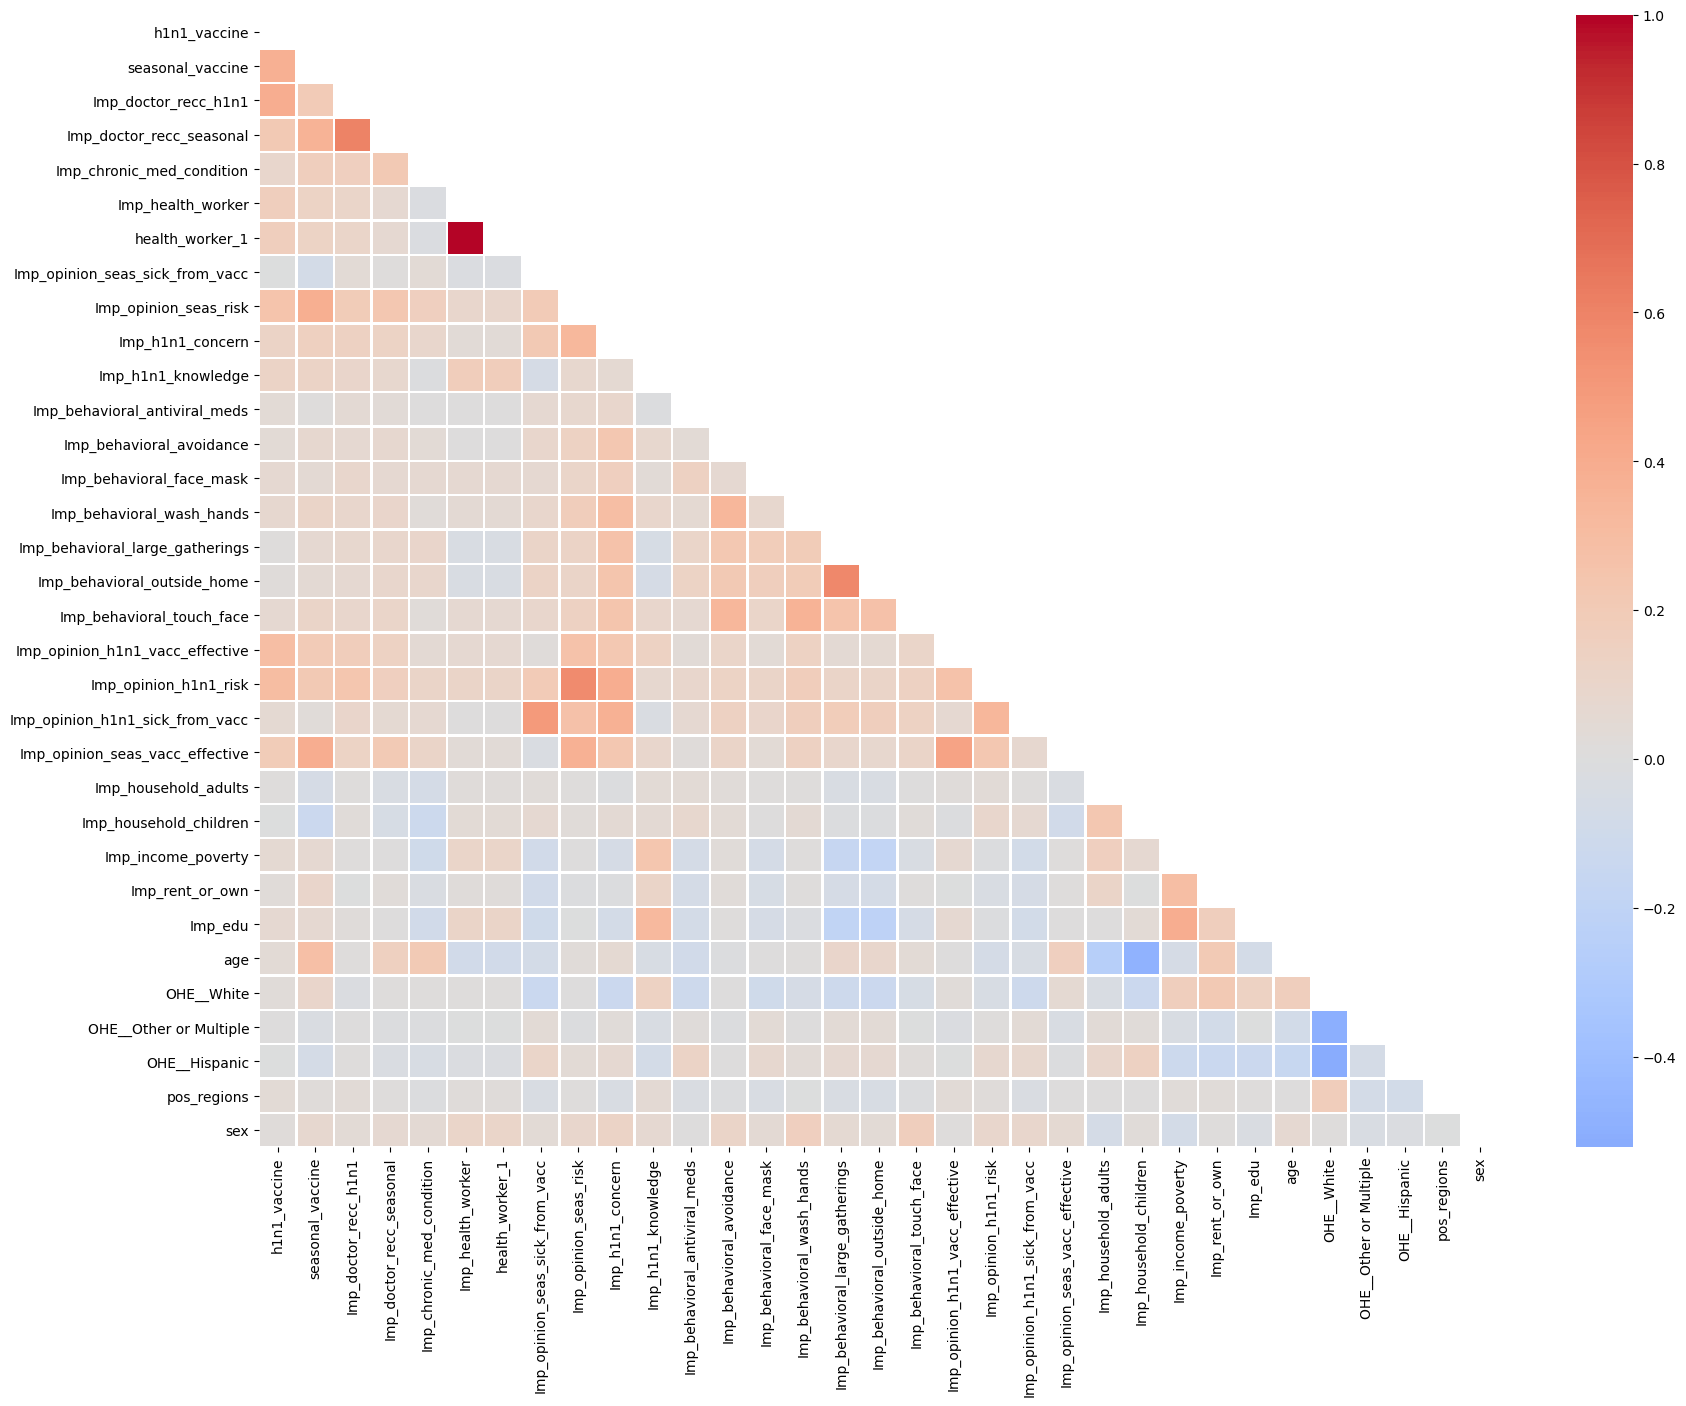

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-85-8065d4f9223d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False

[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.834974       0.832647  0.819057   
1                KNN Classifier        0.851771       0.814427  0.829420   
2      Decision Tree Classifier        0.999893       0.744291  0.999893   
3      Random Forest Classifier        0.999840       0.831399  0.999839   
4                XGB Classifier        0.916551       0.828903  0.912532   
5            Bagging Classifier        0.983845       0.816049  0.983644   
6           AdaBoost Classifier        0.834225       0.831898  0.818534   
7  Gradient Boosting Classifier        0.843640       0.833895  0.830281   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.817027        0.830600       0.822637  
1  0.786855        0.910641       0.734442  
2  0.748697        1.000000       0.636377  
3  0.815280        1.000000       0.817694  
4  0.817405        0.956470       0.819860  
5  0.800542        0.999196       0.781301  


In [86]:
prepDataForModelling(df, listOfDfsToTest_h1n1)

## AdaBoost for Seasonal

In [335]:
# Load the data
df = pd.read_csv("C:/Users/Meyke/Documents/Projecten/vaccines/vaccines_all_columns.csv", index_col='Unnamed: 0')
df =df[all_col]

# split df to only get the train data
df_to_submit = df[df['seasonal_vaccine'].isna()]
df = df[df['seasonal_vaccine'].notna()]
        
# split into x and y
x = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"]).values
y = df["seasonal_vaccine"].values
        
# Scale the x data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, random_state=42, stratify=y)

# Create training and test sets
x_test_1, x_validation, y_test_1, y_validation = train_test_split(x_test, y_test, test_size = 0.5, random_state=42, stratify=y_test)

In [82]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best"],
              "base_estimator__max_depth" : [1,2],
              "n_estimators": [160, 180, 200],
              "learning_rate": [0.1, 0.2, 0.3]
             }

DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced")
ABC = AdaBoostClassifier(base_estimator = DTC)

clf = grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc', verbose=2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.6s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.5s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=180; total time=   3

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 2,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.2,
 'n_estimators': 200}

In [83]:
df = pd.DataFrame(clf.cv_results_)

In [84]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__criterion,param_base_estimator__max_depth,param_base_estimator__splitter,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,2.879280,0.027356,0.156656,0.004750,entropy,2,best,0.2,200,"{'base_estimator__criterion': 'entropy', 'base...",0.855423,0.852057,0.860799,0.853543,0.859034,0.856171,0.003287,1
14,2.962891,0.034424,0.154914,0.012637,gini,2,best,0.2,200,"{'base_estimator__criterion': 'gini', 'base_es...",0.856518,0.851758,0.858776,0.852335,0.860465,0.855970,0.003445,2
12,2.398535,0.077963,0.128858,0.005211,gini,2,best,0.2,160,"{'base_estimator__criterion': 'gini', 'base_es...",0.856088,0.851395,0.859586,0.851867,0.857960,0.855379,0.003258,3
17,2.971727,0.101336,0.161200,0.003965,gini,2,best,0.3,200,"{'base_estimator__criterion': 'gini', 'base_es...",0.854116,0.852242,0.859292,0.851240,0.859685,0.855315,0.003533,4
31,2.601416,0.039529,0.141914,0.000850,entropy,2,best,0.2,180,"{'base_estimator__criterion': 'entropy', 'base...",0.852756,0.851178,0.858550,0.853188,0.859553,0.855045,0.003354,5


### Gradient Boosting Classifier for Seasonal

In [79]:
param_grid = {"loss" : ['deviance', 'exponential'],
               "learning_rate": [1e-1, 1],
              "n_estimators" : [80, 100],
              "subsample" : [0.6, 0.8, 1.0],
              "criterion" : ['friedman_mse','mse']
             }

GB = GradientBoostingClassifier(random_state=42)

clf = grid_search_LR = GridSearchCV(GB, param_grid=param_grid, scoring = 'roc_auc', verbose=2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.6; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.6; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.6; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.6; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.6; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.8; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.8; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=80, subsample=0.8; total time=  

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 100,
 'subsample': 0.8}

In [80]:
df = pd.DataFrame(clf.cv_results_)

In [81]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,2.390794,0.044851,0.010439,0.004562,mse,0.1,exponential,100,0.8,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.856988,0.854415,0.862937,0.853273,0.859410,0.857405,0.003487,1
10,2.261228,0.029425,0.010245,0.000848,friedman_mse,0.1,exponential,100,0.8,"{'criterion': 'friedman_mse', 'learning_rate':...",0.856988,0.854415,0.862937,0.853273,0.859410,0.857405,0.003487,1
28,2.355923,0.032556,0.010948,0.001057,mse,0.1,deviance,100,0.8,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.857262,0.854561,0.862115,0.853064,0.859489,0.857298,0.003269,3
4,2.307500,0.039253,0.011136,0.002608,friedman_mse,0.1,deviance,100,0.8,"{'criterion': 'friedman_mse', 'learning_rate':...",0.857262,0.854561,0.862059,0.853064,0.859489,0.857287,0.003252,4
35,2.746064,0.048884,0.010343,0.000920,mse,0.1,exponential,100,1.0,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.857359,0.853864,0.862141,0.852180,0.858758,0.856861,0.003539,5


### Logistic Regression for Seasonal

In [73]:
param_grid = {"solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" :   ['none', 'l1', 'l2', 'elasticnet'],
              "C" : [1e-2, 1e-1, 1, 10]
             }

LR = LogisticRegression(max_iter = 100000,  random_state=42)

clf = grid_search_LR = GridSearchCV(LR, param_grid=param_grid, scoring = 'roc_auc', n_jobs=-1, verbose =2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84825281 0.84825386        nan        nan        nan 0.84738352
 0.84819095 0.84819007 0.8481939         nan        nan        nan
 0.84825281 0.84825386        nan        nan        nan 0.84831204
 0.8482661  0.84826421 0.84826601        nan        nan        nan
 0.84825281 0.84825386        nan        nan        nan 0.84827971
 0.84825928 0.84825857 0.84825915        nan        nan        nan
 0.84825281 0.84825386        nan        nan        nan 0.84825774
 0.84825474 0.84825633 0.84825426        nan        nan        nan]
  warnings.warn(


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [74]:
df = pd.DataFrame(clf.cv_results_)

In [75]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.029746,0.259011,0.006680,0.001699,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.846109,0.842808,0.854932,0.843222,0.854491,0.848312,0.005349,1
29,7.224464,1.380916,0.012517,0.003022,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.846095,0.842823,0.854784,0.843051,0.854645,0.848280,0.005380,2
18,1.637924,0.104893,0.007323,0.000749,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.846087,0.842754,0.854828,0.843103,0.854558,0.848266,0.005375,3
20,1.642928,0.100571,0.019156,0.015207,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.846083,0.842753,0.854831,0.843103,0.854559,0.848266,0.005376,4
19,0.742328,0.071600,0.007397,0.000489,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846081,0.842752,0.854828,0.843104,0.854557,0.848264,0.005375,5


### Create VotingClassifier Seasonal

In [336]:
DTC = DecisionTreeClassifier(max_features = "auto", class_weight = "balanced", criterion = "entropy", max_depth = 2, splitter = "best")
    
clf1 = LogisticRegression(max_iter = 100000, C=0.1, penalty='l1', solver='liblinear',  random_state=42)
clf2 = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'exponential', n_estimators = 100, subsample = 0.8,  random_state=42)
clf3 = AdaBoostClassifier(base_estimator = DTC, learning_rate = 0.2, n_estimators = 200,  random_state=42)
clf4 = LogisticRegression(max_iter = 100000, C=0.1, penalty='l1', solver='liblinear',  random_state=52)
clf5 = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'exponential', n_estimators = 100, subsample = 0.8,  random_state=52)
clf6 = AdaBoostClassifier(base_estimator = DTC, learning_rate = 0.2, n_estimators = 200,  random_state=52)

In [337]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='hard')

In [338]:
eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='soft')

In [339]:
eclf3 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='soft', weights=[3,1,2,2,1,1],
        flatten_transform=True)

In [340]:
eclf1 = eclf1.fit(x_train, y_train)
eclf2 = eclf2.fit(x_train, y_train)
eclf3 = eclf3.fit(x_train, y_train)

In [341]:
eclf1_pred = eclf1.predict(x_test_1)
#eclf1_pred_proba = eclf1.predict_proba(x_test_1)

eclf2_pred = eclf2.predict(x_test_1)
eclf2_pred_proba = eclf2.predict_proba(x_test_1)

eclf3_pred = eclf3.predict(x_test_1)
eclf3_pred_proba = eclf3.predict_proba(x_test_1)

In [342]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

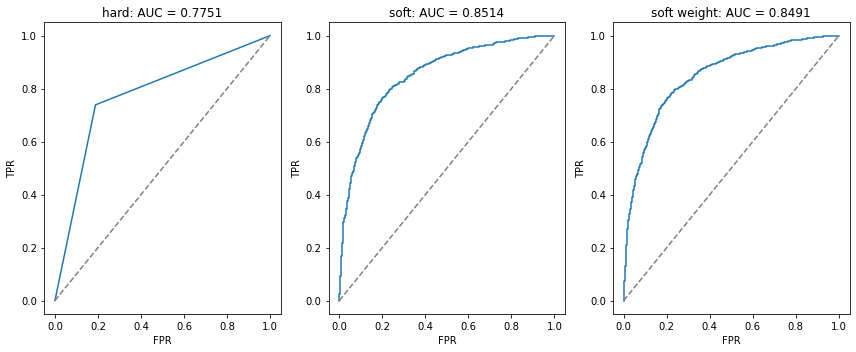

In [343]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

plot_roc(
    y_test_1, 
    eclf1_pred, 
    'hard',
    ax=ax[0]
)
plot_roc(
    y_test_1, 
    eclf2_pred_proba[:,1], 
    'soft',
    ax=ax[1]
)
plot_roc(
    y_test_1, 
    eclf3_pred_proba[:,1], 
    'soft weight',
    ax=ax[2]
)
fig.tight_layout()

In [344]:
eclf1_pred = eclf1.predict(x_validation)
#eclf1_pred_proba = eclf1.predict_proba(x_test_1)

eclf2_pred = eclf2.predict(x_validation)
eclf2_pred_proba = eclf2.predict_proba(x_validation)

eclf3_pred = eclf3.predict(x_validation)
eclf3_pred_proba = eclf3.predict_proba(x_validation)

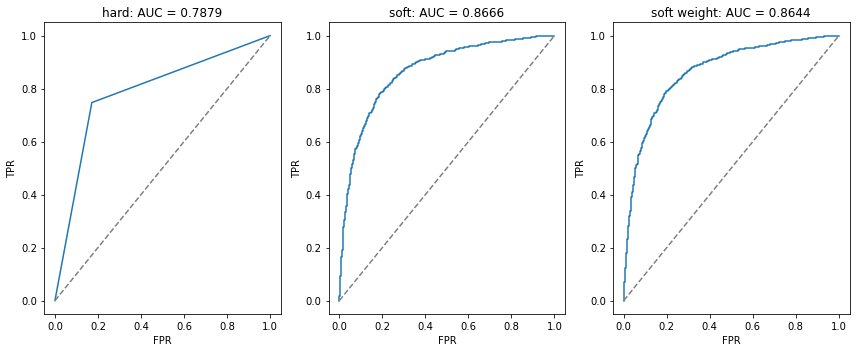

In [345]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

plot_roc(
    y_validation, 
    eclf1_pred, 
    'hard',
    ax=ax[0]
)
plot_roc(
    y_validation, 
    eclf2_pred_proba[:,1], 
    'soft',
    ax=ax[1]
)
plot_roc(
    y_validation, 
    eclf3_pred_proba[:,1], 
    'soft weight',
    ax=ax[2]
)
fig.tight_layout()

### Train on  entire dataset

In [381]:
# Load the data
df = pd.read_csv("C:/Users/Meyke/Documents/Projecten/vaccines/vaccines_all_columns.csv", index_col='Unnamed: 0')

# split df to only get the train data
df_to_submit = df[df['seasonal_vaccine'].isna()]
df = df[df['seasonal_vaccine'].notna()]
        
# split into x and y
x = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"]).values
x_to_submit = df_to_submit.drop(columns=["h1n1_vaccine","seasonal_vaccine"]).values

y = df["seasonal_vaccine"].values
        
# Scale the x data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_to_submit_scaled = scaler.transform(x_to_submit)

In [382]:
eclf2 = eclf2.fit(x_scaled, y)

In [383]:
eclf2_pred_proba = eclf2.predict_proba(x_to_submit_scaled)

In [384]:
eclf2_pred = eclf2.predict(x_to_submit_scaled)

In [385]:
eclf2_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [386]:
eclf2_pred_proba

array([[0.69614008, 0.30385992],
       [0.81885623, 0.18114377],
       [0.32099829, 0.67900171],
       ...,
       [0.70143884, 0.29856116],
       [0.57738247, 0.42261753],
       [0.45531542, 0.54468458]])

In [387]:
eclf2_pred_proba = eclf2_pred_proba[:,1]

In [388]:
eclf2_pred_proba = eclf2_pred_proba.tolist()

In [389]:
# Add predictions to the dataframe
df_to_submit['seasonal_vaccine'] = eclf2_pred

In [390]:
df_to_submit['seasonal'] = eclf2_pred_proba

In [391]:
df_to_submit.head()

,Imp_health_insurance,health_insurance_1,Imp_doctor_recc_h1n1,doctor_recc_h1n1_1,Imp_doctor_recc_seasonal,doctor_rec_seas_1,Imp_chronic_med_condition,chronic_med_condition_1,child_under_6M,Imp_health_worker,...,Imp_edu,age,OHE__White,OHE__Other or Multiple,OHE__Hispanic,pos_regions,sex,h1n1_vaccine,seasonal_vaccine,seasonal
26707,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,4.0,40,0,0,1,0,1,NaN,0.0,0.303860
26708,0.0,1,0.0,0,0.0,0,0.0,0,0,0.0,...,2.0,26,1,0,0,1,0,NaN,0.0,0.181144
26709,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,4.0,60,1,0,0,0,0,NaN,1.0,0.679002
26710,1.0,0,1.0,1,1.0,1,1.0,1,0,0.0,...,2.0,70,1,0,0,0,1,NaN,1.0,0.748042
26711,1.0,0,0.0,0,0.0,0,0.0,0,0,1.0,...,2.0,40,0,0,0,0,1,NaN,0.0,0.478616


In [398]:
df_copy = df_to_submit[['seasonal']]

In [400]:
del df_to_submit['seasonal']

In [401]:
df_copy.head()

,seasonal
26707,0.303860
26708,0.181144
26709,0.679002
26710,0.748042
26711,0.478616


In [402]:
df_nieuw = pd.concat([df, df_to_submit])

In [403]:
df_nieuw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Imp_health_insurance             53415 non-null  float64
 1   health_insurance_1               53415 non-null  int64  
 2   Imp_doctor_recc_h1n1             53415 non-null  float64
 3   doctor_recc_h1n1_1               53415 non-null  int64  
 4   Imp_doctor_recc_seasonal         53415 non-null  float64
 5   doctor_rec_seas_1                53415 non-null  int64  
 6   Imp_chronic_med_condition        53415 non-null  float64
 7   chronic_med_condition_1          53415 non-null  int64  
 8   child_under_6M                   53415 non-null  int64  
 9   Imp_health_worker                53415 non-null  float64
 10  health_worker_1                  53415 non-null  int64  
 11  Imp_opinion_seas_sick_from_vacc  53415 non-null  float64
 12  Imp_opinion_seas_r

# H1N1

## Test first models for H1n1

In [190]:
def prepDataForModelling(df_nieuw, listOfDfsToTest_h1n1):
    for listofDf in listOfDfsToTest_seas:
        df_nieuw =df_nieuw[listofDf]
        
        correlation = df_nieuw.corr(method="spearman")
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        fig = plt.figure(figsize=(20,15), dpi=100, facecolor = 'w', edgecolor="k")
        figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")
        plt.title("", fontsize = 20) 
        plt.show()
        
        # split df to only get the train data
        df_nieuw_to_submit = df_nieuw[df_nieuw['h1n1_vaccine'].isna()]
        df_nieuw = df_nieuw[df_nieuw['h1n1_vaccine'].notna()]
        
        # split into x and y
        x = df_nieuw.drop(columns=["h1n1_vaccine"]).values
        y = df_nieuw[["h1n1_vaccine"]].values
        
        # Scale the x data
        scaler = StandardScaler()
        scaler.fit(x)
        x_scaled = scaler.transform(x)

        # Create training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)
        
        # Try bunch of models for first impression
        # with non-scaled or regualrized data
        models=[LogisticRegression(max_iter = 100000,  random_state=42),
                KNeighborsClassifier(n_neighbors = 4),
                DecisionTreeClassifier( random_state=42),
                RandomForestClassifier( random_state=42),
                XGBClassifier( random_state=42),
                BaggingClassifier( random_state=42), 
                AdaBoostClassifier( random_state=42),
                GradientBoostingClassifier( random_state=42)]

        names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier']

        train_accuracy=[]
        test_accuracy=[]
        train_f1=[]
        test_f1=[]
        train_seas_auc=[]
        test_seas_auc=[]


        d={}
        for model in range (len(models)):
            clf=models[model]
            clf.fit(x_train,y_train)

            # y_pred
            test_pred=clf.predict(x_test)
            train_pred=clf.predict(x_train) 

            # y_proba
            y_pred_proba_train = clf.predict_proba(x_train)
            y_pred_proba_test = clf.predict_proba(x_test)

            # accuracy
            train_accuracy.append(accuracy_score(y_train, train_pred))
            test_accuracy.append(accuracy_score(y_test, test_pred))

            # f1
            train_f1.append(f1_score(y_train, train_pred, average='weighted'))
            test_f1.append(f1_score(y_test, test_pred, average='weighted'))

            # auc_seasonal
            train_seas_auc.append(roc_auc_score(y_train, y_pred_proba_train[:, 1], average=None))
            test_seas_auc.append(roc_auc_score(y_test, y_pred_proba_test[:, 1], average=None))
            #print(y_pred_proba_train)

        d= {'Model':names,'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Train f1':train_f1, 'Test f1': test_f1, 'Train AUC Seas': train_seas_auc, 'Test AUC Seas': test_seas_auc}   
        score_df = pd.DataFrame(d)
        print(score_df)

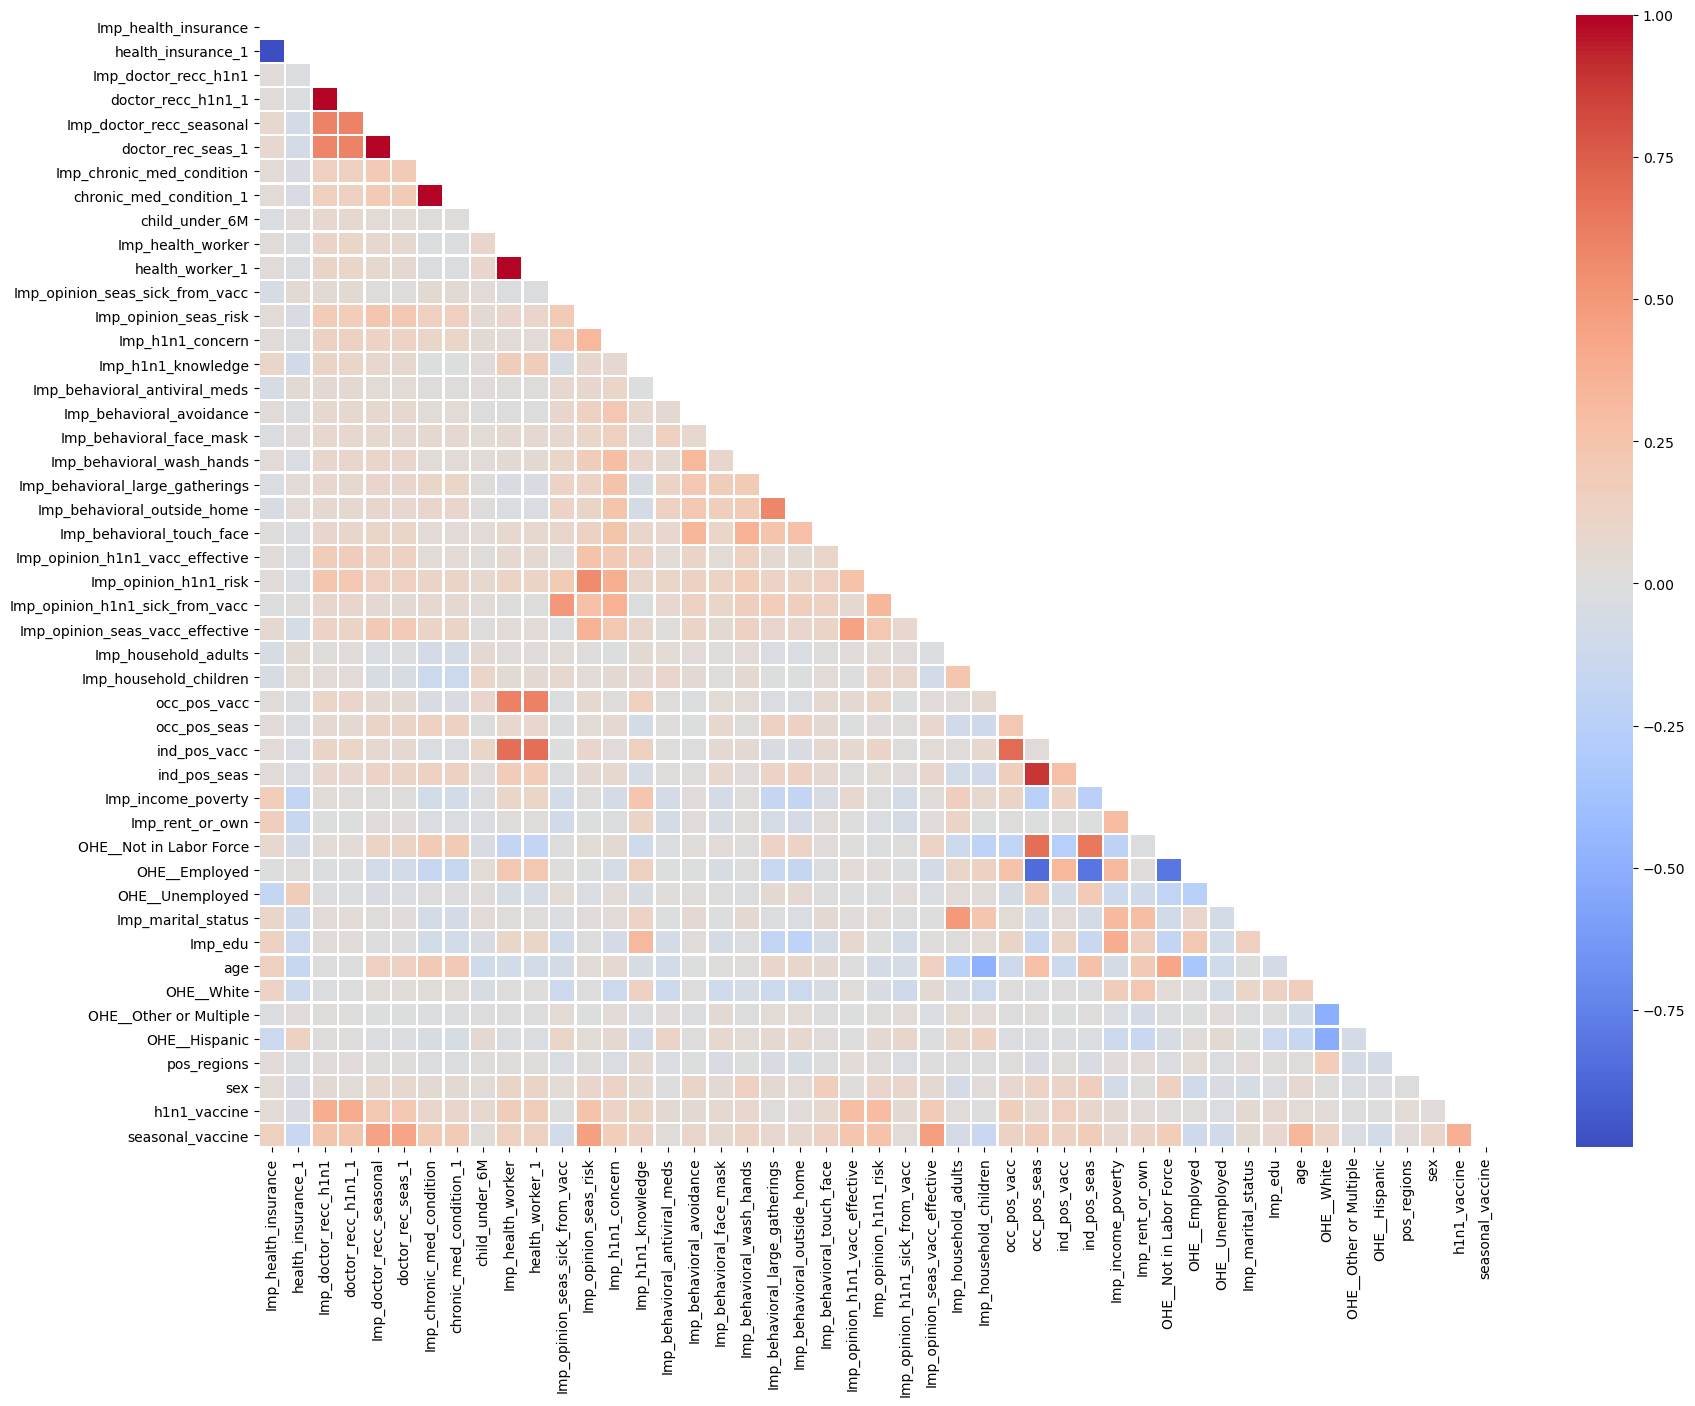

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-190-3d0555b97045>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=Fals

[21:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.851985       0.850867  0.843351   
1                KNN Classifier        0.866374       0.818919  0.849819   
2      Decision Tree Classifier        1.000000       0.781231  1.000000   
3      Random Forest Classifier        1.000000       0.853488  1.000000   
4                XGB Classifier        0.934150       0.845002  0.932390   
5            Bagging Classifier        0.986787       0.837514  0.986658   
6           AdaBoost Classifier        0.850861       0.850992  0.842031   
7  Gradient Boosting Classifier        0.858511       0.856234  0.851525   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.841910        0.874746       0.865766  
1  0.795028        0.925258       0.769981  
2  0.782669        1.000000       0.679825  
3  0.843375        1.000000       0.866671  
4  0.839138        0.973646       0.862446  
5  0.828139        0.999284       0.831472  


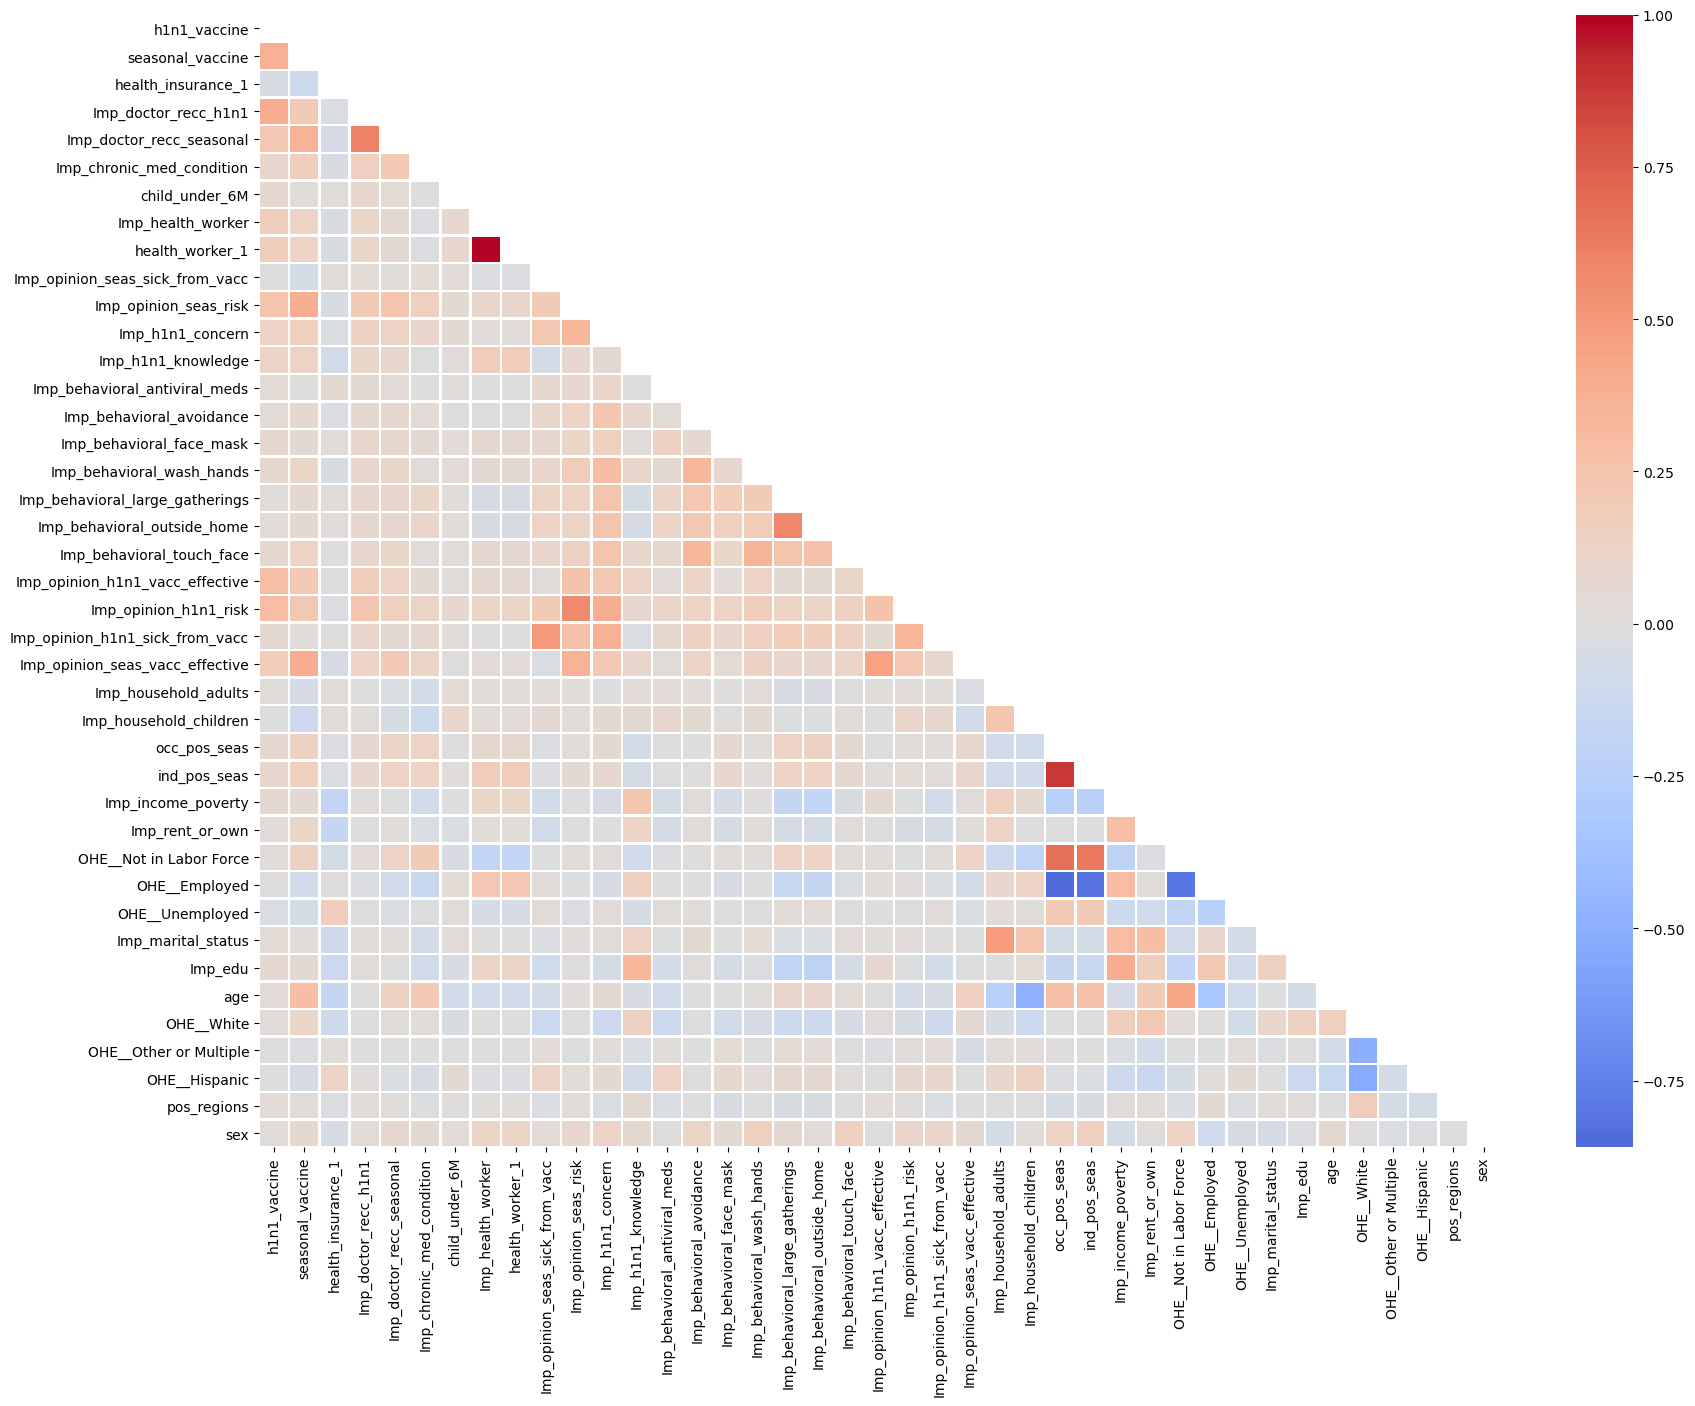

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-190-3d0555b97045>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=Fals

[21:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.851182       0.850119  0.842532   
1                KNN Classifier        0.861132       0.818670  0.842131   
2      Decision Tree Classifier        1.000000       0.773618  1.000000   
3      Random Forest Classifier        1.000000       0.850618  1.000000   
4                XGB Classifier        0.936290       0.845875  0.934657   
5            Bagging Classifier        0.986466       0.834769  0.986334   
6           AdaBoost Classifier        0.850433       0.847997  0.841517   
7  Gradient Boosting Classifier        0.857066       0.854486  0.849908   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.841353        0.873394       0.864179  
1  0.792417        0.924233       0.758320  
2  0.777415        1.000000       0.679712  
3  0.839058        1.000000       0.865122  
4  0.839676        0.974017       0.859221  
5  0.824765        0.999293       0.830007  


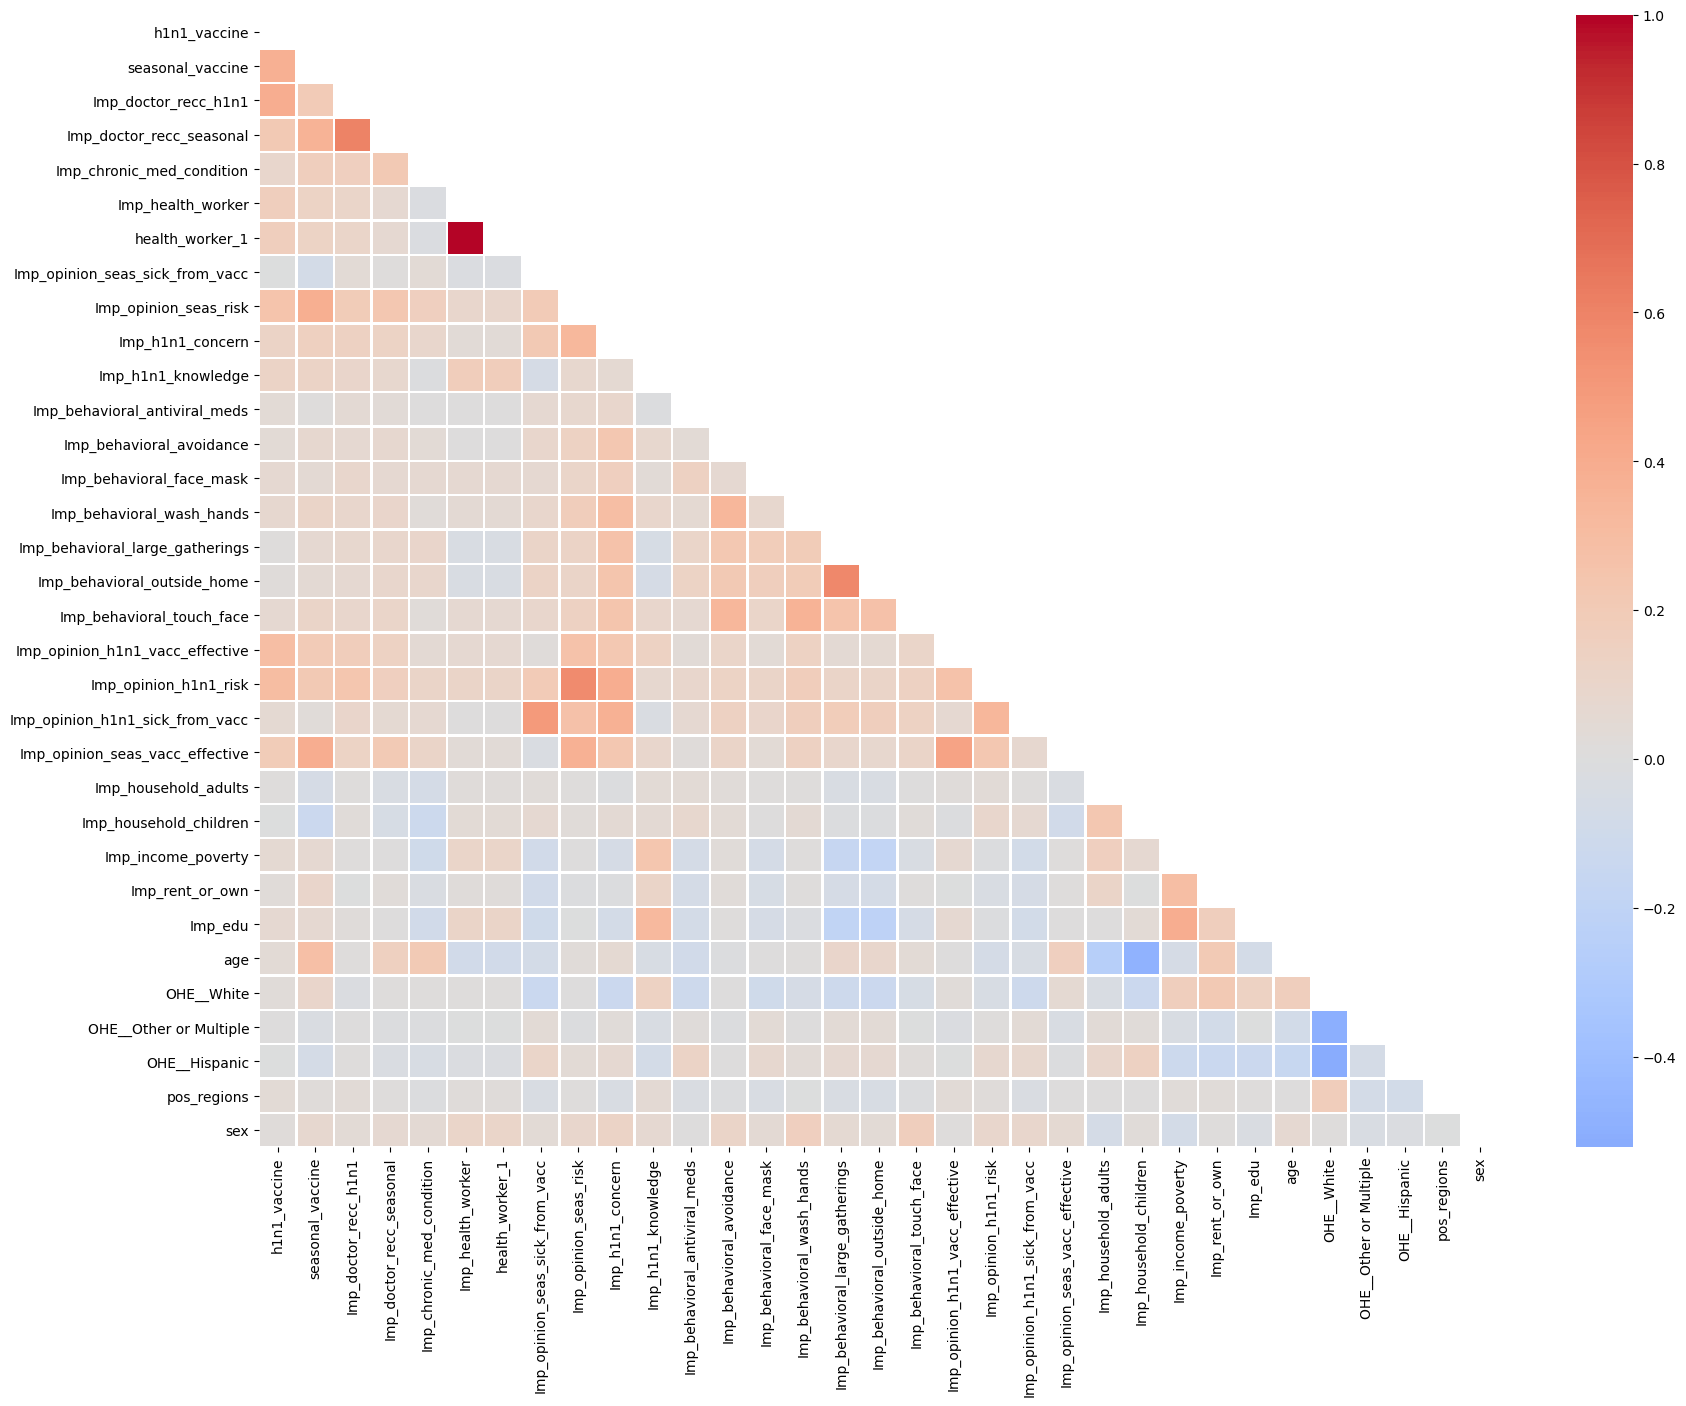

C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-190-3d0555b97045>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=Fals

[21:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Model  Train accuracy  Test accuracy  Train f1  \
0           Logistic Regression        0.850273       0.850493  0.841781   
1                KNN Classifier        0.864716       0.824036  0.847767   
2      Decision Tree Classifier        1.000000       0.768751  1.000000   
3      Random Forest Classifier        0.999947       0.850119  0.999947   
4                XGB Classifier        0.933615       0.847123  0.931840   
5            Bagging Classifier        0.986520       0.835517  0.986388   
6           AdaBoost Classifier        0.849470       0.848247  0.840394   
7  Gradient Boosting Classifier        0.856532       0.855360  0.849567   

    Test f1  Train AUC Seas  Test AUC Seas  
0  0.841773        0.872434       0.863624  
1  0.800781        0.926768       0.776054  
2  0.771911        1.000000       0.668898  
3  0.839191        1.000000       0.862981  
4  0.840887        0.972728       0.860836  
5  0.826027        0.999348       0.834208  


In [191]:
prepDataForModelling(df_nieuw, listOfDfsToTest_h1n1)

In [267]:
del df_nieuw['seasonal']

In [268]:
df_nieuw.isna().sum().sort_values(ascending=False)

Imp_health_insurance               0
OHE__Employed                      0
Imp_household_adults               0
Imp_household_children             0
occ_pos_vacc                       0
occ_pos_seas                       0
ind_pos_vacc                       0
ind_pos_seas                       0
Imp_income_poverty                 0
Imp_rent_or_own                    0
OHE__Not in Labor Force            0
OHE__Unemployed                    0
Imp_opinion_h1n1_sick_from_vacc    0
Imp_marital_status                 0
Imp_edu                            0
age                                0
OHE__White                         0
OHE__Other or Multiple             0
OHE__Hispanic                      0
pos_regions                        0
sex                                0
h1n1_vaccine                       0
Imp_opinion_seas_vacc_effective    0
Imp_opinion_h1n1_risk              0
health_insurance_1                 0
Imp_opinion_seas_sick_from_vacc    0
Imp_doctor_recc_h1n1               0
d

## AdaBoost for H1n1

In [404]:
# split df to only get the train data
df_nieuw_to_submit = df_nieuw[df_nieuw['h1n1_vaccine'].isna()]
df_nieuwTr = df_nieuw[df_nieuw['h1n1_vaccine'].notna()]
        
# split into x and y
x = df_nieuwTr.drop(columns=["h1n1_vaccine"]).values
y = df_nieuwTr["h1n1_vaccine"].values
        
# Scale the x data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, random_state=42, stratify=y)

# Create training and test sets
x_test_1, x_validation, y_test_1, y_validation = train_test_split(x_test, y_test, test_size = 0.5, random_state=42, stratify=y_test)

In [270]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_depth" : [1,2],
              "n_estimators": [160, 180, 200],
              "learning_rate": [0.1, 0.2, 0.3]
             }

DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced")
ABC = AdaBoostClassifier(base_estimator = DTC)

clf = grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc', verbose=2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.5s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.4s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=160; total time=   2.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=1, base_estimator__splitter=best, learning_rate=0.1, n_estimators=180; total time=   2

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.2,
 'n_estimators': 200}

In [271]:
df = pd.DataFrame(clf.cv_results_)

In [272]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__criterion,param_base_estimator__max_depth,param_base_estimator__splitter,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,3.006767,0.110205,0.157717,0.003585,gini,2,best,0.2,200,"{'base_estimator__criterion': 'gini', 'base_es...",0.869161,0.882925,0.879319,0.878278,0.871884,0.876313,0.005047,1
57,2.556261,0.106980,0.139503,0.008878,entropy,2,best,0.2,160,"{'base_estimator__criterion': 'entropy', 'base...",0.869027,0.881138,0.881176,0.877624,0.871977,0.876189,0.004908,2
34,2.496019,0.029970,0.152763,0.011829,gini,2,random,0.3,180,"{'base_estimator__criterion': 'gini', 'base_es...",0.869644,0.883162,0.879475,0.876578,0.870670,0.875906,0.005147,3
61,3.012478,0.135389,0.170228,0.018896,entropy,2,best,0.3,180,"{'base_estimator__criterion': 'entropy', 'base...",0.869249,0.880139,0.882099,0.877377,0.869838,0.875740,0.005281,4
58,2.903804,0.152985,0.160703,0.002211,entropy,2,best,0.2,180,"{'base_estimator__criterion': 'entropy', 'base...",0.870348,0.879608,0.880164,0.875028,0.873355,0.875701,0.003736,5


## Gradient Boosting Classifier for H1n1

In [273]:
param_grid = {"loss" : ['deviance', 'exponential'],
               "learning_rate": [1e-2, 1e-1, 1],
              "n_estimators" : [150, 200],
              "subsample" : [0.4, 0.6, 0.8],
              "criterion" : ['friedman_mse','mse']
             }

GB = GradientBoostingClassifier(random_state=42)

clf = grid_search_LR = GridSearchCV(GB, param_grid=param_grid, scoring = 'roc_auc', verbose=2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.4; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.4; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.4; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.4; total time=   2.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.4; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.6; total time=   2.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.6; total time=   2.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=150, subsample=0.

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 150,
 'subsample': 0.6}

In [274]:
df = pd.DataFrame(clf.cv_results_)

In [275]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,2.930406,0.049636,0.014964,0.003084,friedman_mse,0.1,deviance,150,0.6,"{'criterion': 'friedman_mse', 'learning_rate':...",0.872453,0.885076,0.882483,0.881530,0.874465,0.879201,0.004872,1
49,2.866609,0.037721,0.012413,0.001312,mse,0.1,deviance,150,0.6,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.872453,0.885076,0.882225,0.881773,0.874455,0.879196,0.004865,2
14,3.606130,0.179161,0.012985,0.001704,friedman_mse,0.1,deviance,150,0.8,"{'criterion': 'friedman_mse', 'learning_rate':...",0.872445,0.884440,0.883386,0.880325,0.875358,0.879191,0.004618,3
58,3.593071,0.024682,0.016389,0.003374,mse,0.1,exponential,200,0.6,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.874068,0.885267,0.881816,0.881074,0.873721,0.879189,0.004550,4
50,3.529109,0.088889,0.011956,0.001970,mse,0.1,deviance,150,0.8,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.872445,0.884427,0.883386,0.880325,0.875358,0.879188,0.004615,5


## Logistic Regression for H1n1

In [276]:
param_grid = {"solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" :   ['none', 'l1', 'l2', 'elasticnet'],
              "C" : [1e-2, 1e-1, 1, 10]
             }

LR = LogisticRegression(max_iter = 100000,  random_state=42)

clf = grid_search_LR = GridSearchCV(LR, param_grid=param_grid, scoring = 'roc_auc', n_jobs=-1, verbose =2)

search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Meyke\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.87162044 0.87162431        nan        nan        nan 0.87078966
 0.87187566 0.87187618 0.87188019        nan        nan        nan
 0.87162044 0.87162431        nan        nan        nan 0.87235281
 0.87208782 0.87208612 0.87209234        nan        nan        nan
 0.87162044 0.87162431        nan        nan        nan 0.87197995
 0.87183351 0.87183305 0.87183528        nan        nan        nan
 0.87162044 0.87162431        nan        nan        nan 0.87169055
 0.87165154 0.87165154 0.87165815        nan        nan        nan]
  warnings.warn(


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [277]:
df = pd.DataFrame(clf.cv_results_)

In [278]:
df.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.135449,0.836066,0.016438,0.011829,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.865371,0.878823,0.876240,0.872889,0.868441,0.872353,0.004925,1
20,2.298479,0.164592,0.011307,0.000864,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.865276,0.878905,0.876141,0.872668,0.867471,0.872092,0.005118,2
18,2.187526,0.270294,0.010238,0.001761,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.865254,0.878911,0.876144,0.872667,0.867464,0.872088,0.005127,3
19,1.307780,0.167221,0.012228,0.002536,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.865254,0.878910,0.876143,0.872665,0.867458,0.872086,0.005127,4
29,13.145468,2.388003,0.007068,0.004040,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.865291,0.879027,0.876163,0.872714,0.866704,0.871980,0.005297,5


## Create Voting Classifier for H1n1

In [405]:
DTC = DecisionTreeClassifier(max_features = "auto", class_weight = "balanced", criterion = "gini", max_depth = 2, splitter = "best")
    
clf1 = LogisticRegression(max_iter = 100000, C=0.1, penalty='l1', solver='liblinear',  random_state=42)
clf2 = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'deviance', n_estimators = 150, subsample = 0.6,  random_state=42)
clf3 = AdaBoostClassifier(base_estimator = DTC, learning_rate = 0.3, n_estimators = 160,  random_state=42)
clf4 = LogisticRegression(max_iter = 100000, C=0.1, penalty='l1', solver='liblinear',  random_state=52)
clf5 = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'deviance', n_estimators = 150, subsample = 0.6,  random_state=52)
clf6 = AdaBoostClassifier(base_estimator = DTC, learning_rate = 0.3, n_estimators = 160,  random_state=52)

In [406]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='hard')

In [407]:
eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='soft')

In [408]:
eclf3 = VotingClassifier(estimators=[
         ('lr', clf1), ('gb', clf2), ('ab', clf3),('lr2', clf4), ('gb2', clf5), ('ab2', clf6)], voting='soft', weights=[1,2,2,1,2,2],
        flatten_transform=True)

In [409]:
eclf1 = eclf1.fit(x_train, y_train)
eclf2 = eclf2.fit(x_train, y_train)
eclf3 = eclf3.fit(x_train, y_train)


eclf1_pred = eclf1.predict(x_test_1)
#eclf1_pred_proba = eclf1.predict_proba(x_test_1)

eclf2_pred = eclf2.predict(x_test_1)
eclf2_pred_proba = eclf2.predict_proba(x_test_1)

eclf3_pred = eclf3.predict(x_test_1)
eclf3_pred_proba = eclf3.predict_proba(x_test_1)

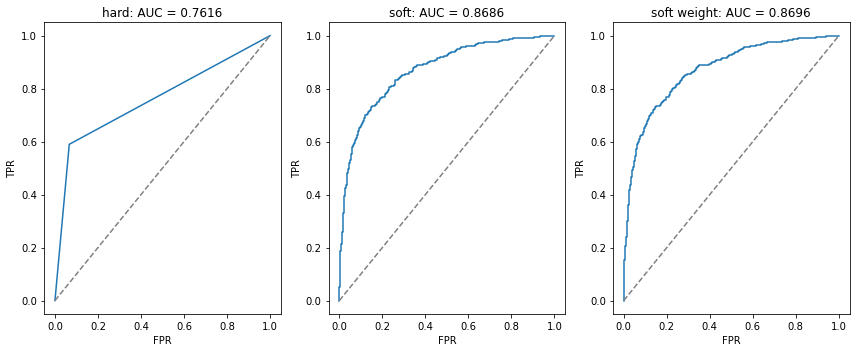

In [410]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

plot_roc(
    y_test_1, 
    eclf1_pred, 
    'hard',
    ax=ax[0]
)
plot_roc(
    y_test_1, 
    eclf2_pred_proba[:,1], 
    'soft',
    ax=ax[1]
)
plot_roc(
    y_test_1, 
    eclf3_pred_proba[:,1], 
    'soft weight',
    ax=ax[2]
)
fig.tight_layout()

In [411]:
eclf1_pred = eclf1.predict(x_validation)
#eclf1_pred_proba = eclf1.predict_proba(x_test_1)

eclf2_pred = eclf2.predict(x_validation)
eclf2_pred_proba = eclf2.predict_proba(x_validation)

eclf3_pred = eclf3.predict(x_validation)
eclf3_pred_proba = eclf3.predict_proba(x_validation)

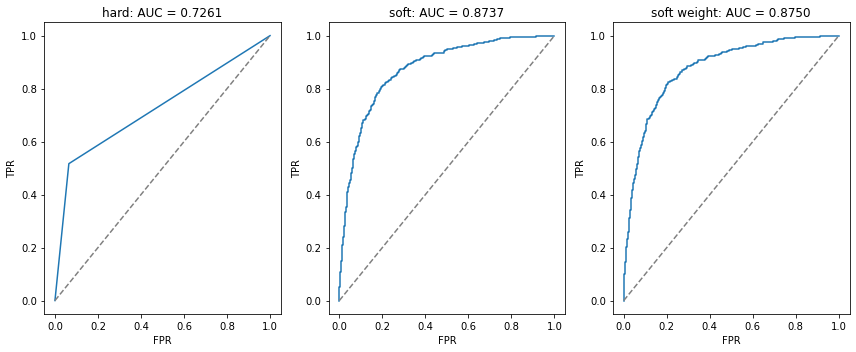

In [412]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

plot_roc(
    y_validation, 
    eclf1_pred, 
    'hard',
    ax=ax[0]
)
plot_roc(
    y_validation, 
    eclf2_pred_proba[:,1], 
    'soft',
    ax=ax[1]
)
plot_roc(
    y_validation, 
    eclf3_pred_proba[:,1], 
    'soft weight',
    ax=ax[2]
)
fig.tight_layout()

In [413]:
df_nieuw.isna().sum().sort_values(ascending=False)

h1n1_vaccine                       26708
Imp_health_insurance                   0
OHE__Employed                          0
Imp_household_adults                   0
Imp_household_children                 0
occ_pos_vacc                           0
occ_pos_seas                           0
ind_pos_vacc                           0
ind_pos_seas                           0
Imp_income_poverty                     0
Imp_rent_or_own                        0
OHE__Not in Labor Force                0
OHE__Unemployed                        0
Imp_opinion_h1n1_sick_from_vacc        0
Imp_marital_status                     0
Imp_edu                                0
age                                    0
OHE__White                             0
OHE__Other or Multiple                 0
OHE__Hispanic                          0
pos_regions                            0
sex                                    0
Imp_opinion_seas_vacc_effective        0
Imp_opinion_h1n1_risk                  0
health_insurance

## Train on entire dataset

In [414]:
# split df to only get the train data
df_nieuw_to_submit = df_nieuw[df_nieuw['h1n1_vaccine'].isna()]
df_nieuw = df_nieuw[df_nieuw['h1n1_vaccine'].notna()]
        
# split into x and y
x = df_nieuw.drop(columns=["h1n1_vaccine"]).values
x_to_submit = df_nieuw_to_submit.drop(columns=["h1n1_vaccine"]).values
y = df_nieuw["h1n1_vaccine"].values
        
# Scale the x data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_to_submit_scaled = scaler.transform(x_to_submit)

In [415]:
df_nieuw_to_submit.head()

,Imp_health_insurance,health_insurance_1,Imp_doctor_recc_h1n1,doctor_recc_h1n1_1,Imp_doctor_recc_seasonal,doctor_rec_seas_1,Imp_chronic_med_condition,chronic_med_condition_1,child_under_6M,Imp_health_worker,...,Imp_marital_status,Imp_edu,age,OHE__White,OHE__Other or Multiple,OHE__Hispanic,pos_regions,sex,h1n1_vaccine,seasonal_vaccine
26707,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,4.0,40,0,0,1,0,1,NaN,0.0
26708,0.0,1,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,2.0,26,1,0,0,1,0,NaN,0.0
26709,1.0,0,0.0,0,0.0,0,0.0,0,0,0.0,...,1.0,4.0,60,1,0,0,0,0,NaN,1.0
26710,1.0,0,1.0,1,1.0,1,1.0,1,0,0.0,...,1.0,2.0,70,1,0,0,0,1,NaN,1.0
26711,1.0,0,0.0,0,0.0,0,0.0,0,0,1.0,...,0.0,2.0,40,0,0,0,0,1,NaN,0.0


In [416]:
eclf3 = eclf3.fit(x_scaled, y)

In [417]:
eclf3_pred_proba = eclf3.predict_proba(x_to_submit_scaled)

In [418]:
eclf3_pred = eclf3.predict(x_to_submit_scaled)

In [419]:
eclf3_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [420]:
eclf3_pred_proba

array([[0.78092359, 0.21907641],
       [0.78694207, 0.21305793],
       [0.49126124, 0.50873876],
       ...,
       [0.76157077, 0.23842923],
       [0.78939935, 0.21060065],
       [0.44733406, 0.55266594]])

In [421]:
eclf3_pred_proba = eclf3_pred_proba[:,1]

In [422]:
eclf3_pred_proba = eclf3_pred_proba.tolist()

In [423]:
df_copy['h1n1_vaccine'] = eclf3_pred_proba

<ipython-input-423-5ed8fd91363e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['h1n1_vaccine'] = eclf3_pred_proba


In [426]:
df_copy = df_copy.rename(columns={'seasonal': 'seasonal_vaccine'})

In [427]:
df_copy.head()

,seasonal_vaccine,h1n1_vaccine
26707,0.303860,0.219076
26708,0.181144,0.213058
26709,0.679002,0.508739
26710,0.748042,0.568942
26711,0.478616,0.261163


In [429]:
df_copy = df_copy[['h1n1_vaccine','seasonal_vaccine']]

In [430]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 26707 to 53414
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h1n1_vaccine      26708 non-null  float64
 1   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2)
memory usage: 626.0 KB


In [431]:
df_copy.to_csv("C:/Users/Meyke/Documents/Projecten/vaccines/submission_1-27112021.csv")